<a href="https://colab.research.google.com/github/Koushik890/Machine-Learning-with-python-predict-loan-status/blob/main/Predict%20loan%20status_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import  ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
loan=pd.read_csv('/content/drive/My Drive/Globsyn Training/mldata -20200814T134928Z-001/mldata/grp1/credit_train.csv')
loan[:5]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loan.shape

(100514, 19)

In [ ]:
loan.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
print(loan.columns)
print(f"number of rows and columns {loan.shape}")

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')
number of rows and columns (100514, 19)


In [ ]:
loan.rename(columns={"Loan Status":"ls","Term":"term","Credit Score":"credit_score","Annual Income":"annual_income","Purpose":"purpose","Monthly Debt":"monthly_debt","Current Loan Amount":"curr_la","Years in current job":"years_curr_job","Years of Credit History":"ych","Months since last delinquent":"last_de","Number of Credit Problems":"num_cp","Number of Open Accounts":"num_opacc","Home Ownership":"home_ownership","Current Credit Balance":"cre_balance","Maximum Open Credit":"max_oc","Bankruptcies":"bankruptcies","Tax Liens":"tx_liens"}, inplace = True)
print(loan.columns)

Index(['Loan ID', 'Customer ID', 'ls', 'curr_la', 'term', 'credit_score',
       'annual_income', 'years_curr_job', 'home_ownership', 'purpose',
       'monthly_debt', 'ych', 'last_de', 'num_opacc', 'num_cp', 'cre_balance',
       'max_oc', 'bankruptcies', 'tx_liens'],
      dtype='object')


##7.Check which column has null(na)(percentage)<br>


In [ ]:
null_values=loan.isna().sum()/len(loan)
print(null_values)

Loan ID           0.005114
Customer ID       0.005114
ls                0.005114
curr_la           0.005114
term              0.005114
credit_score      0.195674
annual_income     0.195674
years_curr_job    0.047118
home_ownership    0.005114
purpose           0.005114
monthly_debt      0.005114
ych               0.005114
last_de           0.533806
num_opacc         0.005114
num_cp            0.005114
cre_balance       0.005114
max_oc            0.005134
bankruptcies      0.007143
tx_liens          0.005213
dtype: float64


##8.Find your X and y(target)

In [ ]:
x=loan.drop(columns=["ls",'Loan ID','Customer ID'])
y=loan["ls"]

##9.how many numeric and categorical(string)

In [ ]:
cols = loan.columns
num_cols = loan._get_numeric_data().columns
num_cols

Index(['curr_la', 'credit_score', 'annual_income', 'monthly_debt', 'ych',
       'last_de', 'num_opacc', 'num_cp', 'cre_balance', 'max_oc',
       'bankruptcies', 'tx_liens'],
      dtype='object')

In [ ]:
list(set(cols) - set(num_cols))

['years_curr_job',
 'Customer ID',
 'term',
 'ls',
 'purpose',
 'home_ownership',
 'Loan ID']

In [ ]:
numaric_columns=['curr_la', 'credit_score', 'annual_income', 'monthly_debt', 'ych','last_de', 'num_opacc', 'num_cp', 'cre_balance', 'max_oc','bankruptcies', 'tx_liens']
print(f"We have 12 numaric columns >> \n {numaric_columns}")

categorical_columns=['Customer ID','Loan ID','years_curr_job','home_ownership','term','ls','purpose']
print(f"\nWe have 7 categorical columns >>> \n {categorical_columns}")

print("\n[In all numeric columns we have 0 discrete columns]")

continuous_columns=['curr_la', 'credit_score', 'annual_income', 'monthly_debt', 'ych','last_de', 'num_opacc', 'num_cp', 'cre_balance', 'max_oc','bankruptcies', 'tx_liens']
print(f"\nIn all numeric columns we have 12 continuous columns>>>\n{continuous_columns}")

We have 12 numaric columns >> 
 ['curr_la', 'credit_score', 'annual_income', 'monthly_debt', 'ych', 'last_de', 'num_opacc', 'num_cp', 'cre_balance', 'max_oc', 'bankruptcies', 'tx_liens']

We have 7 categorical columns >>> 
 ['Customer ID', 'Loan ID', 'years_curr_job', 'home_ownership', 'term', 'ls', 'purpose']

[In all numeric columns we have 0 discrete columns]

In all numeric columns we have 12 continuous columns>>>
['curr_la', 'credit_score', 'annual_income', 'monthly_debt', 'ych', 'last_de', 'num_opacc', 'num_cp', 'cre_balance', 'max_oc', 'bankruptcies', 'tx_liens']


In [ ]:
# # Data Types and Missing Values

# See the column data types and non-missing values

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Loan ID         100000 non-null  object 
 1   Customer ID     100000 non-null  object 
 2   ls              100000 non-null  object 
 3   curr_la         100000 non-null  float64
 4   term            100000 non-null  object 
 5   credit_score    80846 non-null   float64
 6   annual_income   80846 non-null   float64
 7   years_curr_job  95778 non-null   object 
 8   home_ownership  100000 non-null  object 
 9   purpose         100000 non-null  object 
 10  monthly_debt    100000 non-null  float64
 11  ych             100000 non-null  float64
 12  last_de         46859 non-null   float64
 13  num_opacc       100000 non-null  float64
 14  num_cp          100000 non-null  float64
 15  cre_balance     100000 non-null  float64
 16  max_oc          99998 non-null   float64
 17  bankruptci

##10.For all categorical , find there labels

In [ ]:
loan["ls"].value_counts()

Fully Paid     77361
Charged Off    22639
Name: ls, dtype: int64

In [ ]:
loan["Loan ID"].value_counts()

06e28a0e-8f7b-4327-8557-95fa665b234c    2
e79a8ce8-701c-4f2c-8357-4a97f1bea103    2
d316fbc7-ffe1-462c-aa5d-3da73d2f3089    2
d626bfa5-c62d-4735-a77c-c134955f5d66    2
b98dda11-6d48-4253-a670-0f02c0da570b    2
                                       ..
31aa51dd-e347-4e85-9998-989fc92a04b1    1
90e7d6b0-1a35-4954-9e92-d031deaee959    1
a22d31c7-65ba-491a-8eaf-c9a29a3dea0f    1
05cf3355-cb7c-40c3-9803-faf8c8d948aa    1
57274d0f-9b13-4758-b174-0b94ff707189    1
Name: Loan ID, Length: 81999, dtype: int64

In [ ]:
loan["Customer ID"].value_counts()

7e930253-392a-4d56-8020-819ed8160082    2
3a964fab-7309-4b5a-a15c-0eeaa4908a86    2
b5fe0316-9115-4643-aba8-59e088e2637d    2
944785c0-d2a5-4a2c-9f42-312bfd490087    2
14e51e33-2280-4818-909b-cbb4c2cee20c    2
                                       ..
caae1207-f835-4b41-b313-904c50e345cc    1
92044d89-f935-482c-9660-39ffd6e42cd4    1
ee0755cc-7a5e-4cf0-9096-1d08150aced2    1
d6add07a-5336-4c41-bd02-df3e5e32c5ea    1
d314178d-6098-4131-a9bf-81859e620786    1
Name: Customer ID, Length: 81999, dtype: int64

In [ ]:
loan["term"].value_counts()

Short Term    72208
Long Term     27792
Name: term, dtype: int64

In [ ]:
loan["years_curr_job"].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: years_curr_job, dtype: int64

In [ ]:
loan["home_ownership"].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: home_ownership, dtype: int64

In [ ]:
loan["purpose"].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: purpose, dtype: int64

In [ ]:
loan["ls"].value_counts()/loan.shape[0]  #In classification : distribution of y

Fully Paid     0.769654
Charged Off    0.225232
Name: ls, dtype: float64

In [ ]:
# Delete Loan ID and Customer ID, this is not necessary 
df_loan=loan.drop(columns=['Loan ID','Customer ID'])
# Drop the columns with > 50% missing
df_loan.drop(columns=["last_de"], axis=1,inplace=True)   

In [ ]:
df_loan.shape

(100514, 16)

In [ ]:
df_loan.dtypes

ls                 object
curr_la           float64
term               object
credit_score      float64
annual_income     float64
years_curr_job     object
home_ownership     object
purpose            object
monthly_debt      float64
ych               float64
num_opacc         float64
num_cp            float64
cre_balance       float64
max_oc            float64
bankruptcies      float64
tx_liens          float64
dtype: object

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ls              100000 non-null  object 
 1   curr_la         100000 non-null  float64
 2   term            100000 non-null  object 
 3   credit_score    80846 non-null   float64
 4   annual_income   80846 non-null   float64
 5   years_curr_job  95778 non-null   object 
 6   home_ownership  100000 non-null  object 
 7   purpose         100000 non-null  object 
 8   monthly_debt    100000 non-null  float64
 9   ych             100000 non-null  float64
 10  num_opacc       100000 non-null  float64
 11  num_cp          100000 non-null  float64
 12  cre_balance     100000 non-null  float64
 13  max_oc          99998 non-null   float64
 14  bankruptcies    99796 non-null   float64
 15  tx_liens        99990 non-null   float64
dtypes: float64(11), object(5)
memory usage: 12.3+ MB


## **Analysis of data**

### **Categorical Columns**

**"term"**

In [ ]:
df_loan["term"].value_counts()/df_loan.shape[0]

Short Term    0.718387
Long Term     0.276499
Name: term, dtype: float64

<Figure size 1440x576 with 0 Axes>

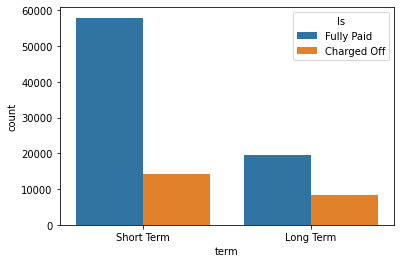

<Figure size 1440x576 with 0 Axes>

In [ ]:
sns.countplot(x="term",hue="ls",data=df_loan)
plt.figure(figsize=(20,8))

In [ ]:
pd.crosstab(df_loan["ls"],df_loan["term"],normalize="columns")

term,Long Term,Short Term
ls,,
Charged Off,0.301022,0.197665
Fully Paid,0.698978,0.802335


**"years_curr_job"**

In [ ]:
df_loan["years_curr_job"].value_counts()/df_loan.shape[0]

10+ years    0.309619
2 years      0.090873
3 years      0.081272
< 1 year     0.081223
5 years      0.067523
1 year       0.064270
4 years      0.061116
6 years      0.056569
7 years      0.055485
8 years      0.045586
9 years      0.039348
Name: years_curr_job, dtype: float64

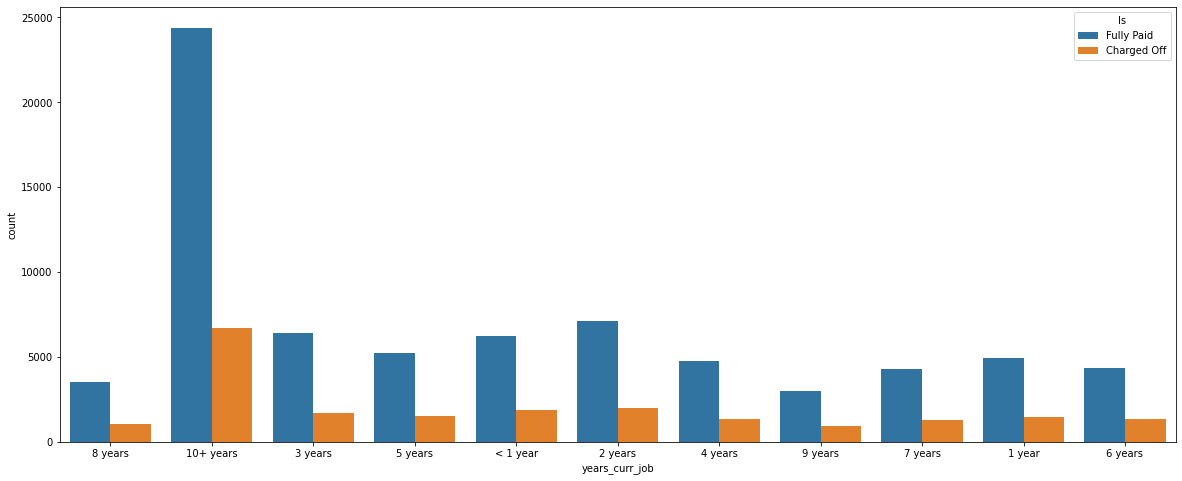

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x="years_curr_job",hue="ls",data=df_loan)


In [ ]:
pd.crosstab(df_loan["ls"],df_loan["years_curr_job"],normalize="columns")

years_curr_job,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
ls,,,,,,,,,,,
Charged Off,0.231115,0.21606,0.219181,0.211776,0.223995,0.225726,0.232149,0.231128,0.229376,0.23818,0.233709
Fully Paid,0.768885,0.78394,0.780819,0.788224,0.776005,0.774274,0.767851,0.768872,0.770624,0.76182,0.766291


**"home_ownership"**

In [ ]:
df_loan["home_ownership"].value_counts()/df_loan.shape[0]

Home Mortgage    0.481624
Rent             0.419782
Own Home         0.091350
HaveMortgage     0.002129
Name: home_ownership, dtype: float64

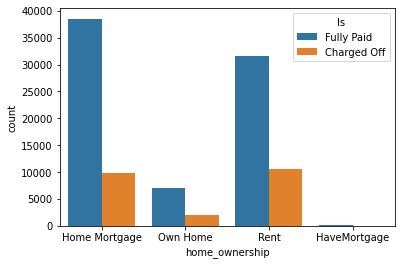

In [ ]:
sns.countplot(x="home_ownership",hue="ls",data=df_loan)

In [ ]:
pd.crosstab(df_loan["ls"],df_loan["home_ownership"],normalize="columns")

home_ownership,HaveMortgage,Home Mortgage,Own Home,Rent
ls,,,,
Charged Off,0.14486,0.20471,0.228926,0.251126
Fully Paid,0.85514,0.79529,0.771074,0.748874


In [ ]:
df_loan["home_ownership"].value_counts()/df_loan.shape[0]

Home Mortgage    0.481624
Rent             0.419782
Own Home         0.091350
HaveMortgage     0.002129
Name: home_ownership, dtype: float64

In [ ]:
def encodenp(pnc):
  if pnc == "HaveMortgage":
    return "Home Mortgage"
  elif pnc == "Rent":
    return "Rent"
  elif pnc == "Home Mortgage":
    return "Home Mortgage"  
  elif pnc == "Own Home":
    return "Own Home"  


In [ ]:
df_loan["home_ownership"]=df_loan["home_ownership"].apply(encodenp)
#loan_null["home_ownership"]=loan_null["home_ownership"].apply(encodenp)
df_loan["home_ownership"].value_counts()/df_loan.shape[0]

Home Mortgage    0.483754
Rent             0.419782
Own Home         0.091350
Name: home_ownership, dtype: float64

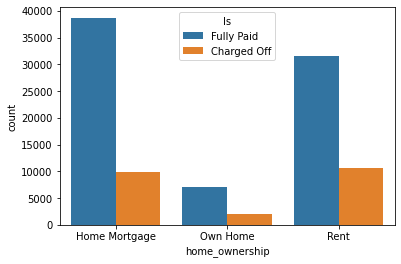

In [ ]:
sns.countplot(x="home_ownership",hue="ls",data=df_loan)

In [ ]:
#loan_null["home_ownership"]=loan_null["home_ownership"].apply(encodenp)
#loan_null["home_ownership"]=loan_null["home_ownership"].apply(encodenp)
#loan_null["home_ownership"].value_counts()/loan_null.shape[0]

In [ ]:
df_loan["purpose"].value_counts()/df_loan.shape[0]

Debt Consolidation      0.781503
other                   0.060061
Home Improvements       0.058091
Other                   0.032334
Business Loan           0.015610
Buy a Car               0.012585
Medical Bills           0.011212
Buy House               0.006745
Take a Trip             0.005701
major_purchase          0.003502
small_business          0.002816
moving                  0.001492
wedding                 0.001144
vacation                0.001005
Educational Expenses    0.000985
renewable_energy        0.000099
Name: purpose, dtype: float64

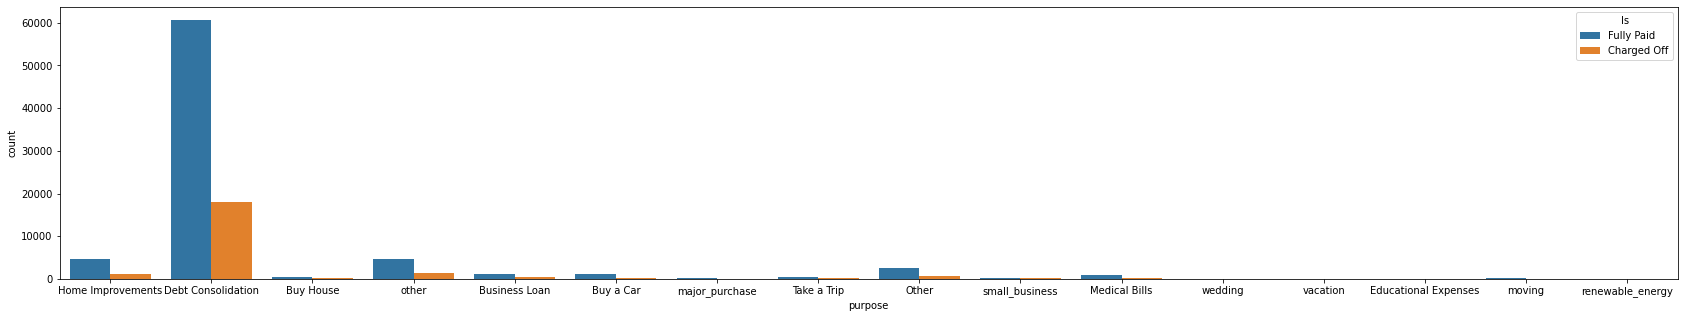

In [ ]:
plt.figure(figsize=(29,5))
sns.countplot(x="purpose",hue="ls",data=df_loan)

In [ ]:
pd.crosstab(df_loan["ls"],df_loan["purpose"],normalize="columns")

purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
ls,,,,,,,,,,,,,,,,
Charged Off,0.304653,0.20649,0.160474,0.228104,0.181818,0.199178,0.246673,0.184615,0.200698,0.232955,0.286667,0.23621,0.4,0.420495,0.287129,0.2
Fully Paid,0.695347,0.79351,0.839526,0.771896,0.818182,0.800822,0.753327,0.815385,0.799302,0.767045,0.713333,0.76379,0.6,0.579505,0.712871,0.8


### **Continuous Column**

**"curr_la"**

In [ ]:
np.round(df_loan.curr_la.describe(),2)

count      100000.00
mean     11760447.39
std      31783942.55
min         10802.00
25%        179652.00
50%        312246.00
75%        524942.00
max      99999999.00
Name: curr_la, dtype: float64

In [ ]:
df_loan.curr_la[df_loan.curr_la==99999999].shape

(11484,)

In [ ]:
df_loan.shape

(100514, 16)

In [ ]:
ser=df_loan.curr_la[df_loan.curr_la != 99999999]

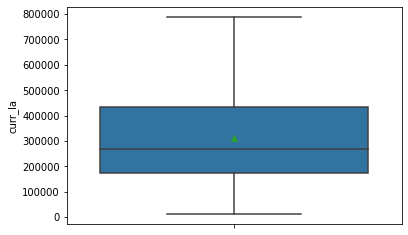

In [ ]:
sns.boxplot(y=ser,showmeans=True)

**credit_score**

In [ ]:
np.round(df_loan.credit_score.describe(),2)

count    80846.00
mean      1076.46
std       1475.40
min        585.00
25%        705.00
50%        724.00
75%        741.00
max       7510.00
Name: credit_score, dtype: float64

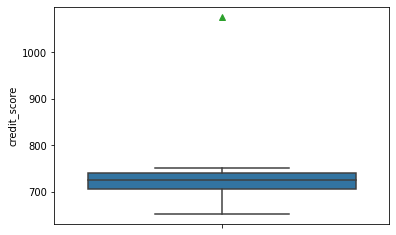

In [ ]:
sns.boxplot(y=df_loan["credit_score"],showmeans=True,sym="")

**"monthly_debt"**

In [ ]:
np.round(df_loan.monthly_debt.describe(),2)

count    100000.00
mean      18472.41
std       12174.99
min           0.00
25%       10214.16
50%       16220.30
75%       24012.06
max      435843.28
Name: monthly_debt, dtype: float64

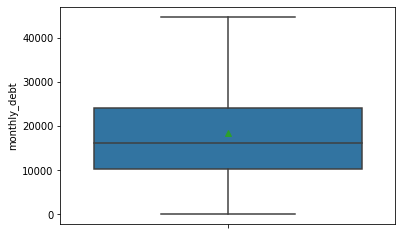

In [ ]:
sns.boxplot(y=df_loan["monthly_debt"],showmeans=True,sym="")

**"ych"**

In [ ]:
np.round(df_loan.ych.describe(),2)

count    100000.00
mean         18.20
std           7.02
min           3.60
25%          13.50
50%          16.90
75%          21.70
max          70.50
Name: ych, dtype: float64

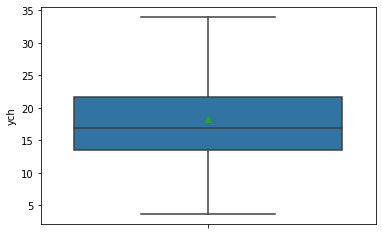

In [ ]:
sns.boxplot(y=df_loan["ych"],showmeans=True,sym="")

**"num_opacc"**

In [ ]:
np.round(df_loan.num_opacc.describe(),2)

count    100000.00
mean         11.13
std           5.01
min           0.00
25%           8.00
50%          10.00
75%          14.00
max          76.00
Name: num_opacc, dtype: float64

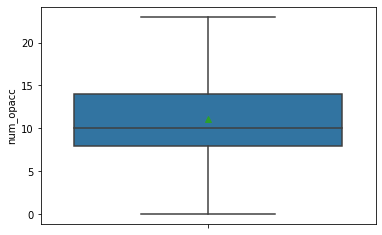

In [ ]:
sns.boxplot(y=df_loan["num_opacc"],showmeans=True,sym="")

**"num_cp"**

In [ ]:
np.round(df_loan.num_cp.describe(),2)

count    100000.00
mean          0.17
std           0.48
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          15.00
Name: num_cp, dtype: float64

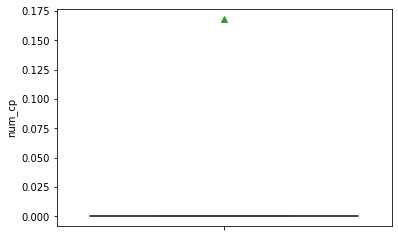

In [ ]:
sns.boxplot(y=df_loan["num_cp"],showmeans=True,sym="")

**"cre_balance"**

In [ ]:
np.round(df_loan.cre_balance.describe(),2)

count      100000.00
mean       294637.38
std        376170.93
min             0.00
25%        112670.00
50%        209817.00
75%        367958.75
max      32878968.00
Name: cre_balance, dtype: float64

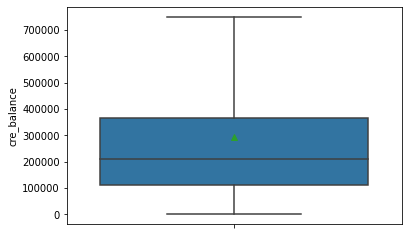

In [ ]:
sns.boxplot(y=df_loan["cre_balance"],showmeans=True,sym="")

**"max_oc"**

In [ ]:
np.round(df_loan.max_oc.describe(),2)

count    9.999800e+04
mean     7.607984e+05
std      8.384503e+06
min      0.000000e+00
25%      2.734380e+05
50%      4.678740e+05
75%      7.829580e+05
max      1.539738e+09
Name: max_oc, dtype: float64

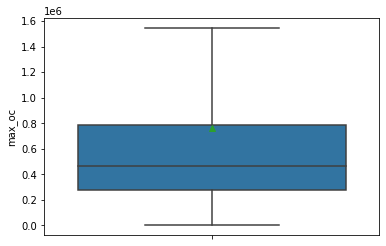

In [ ]:
sns.boxplot(y=df_loan["max_oc"],showmeans=True,sym="")

**"bankruptcies"**

In [ ]:
np.round(df_loan.bankruptcies.describe(),2)

count    99796.00
mean         0.12
std          0.35
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          7.00
Name: bankruptcies, dtype: float64

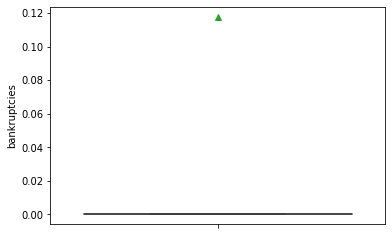

In [ ]:
sns.boxplot(y=df_loan["bankruptcies"],showmeans=True,sym="")

**"tx_liens"**

In [ ]:
np.round(df_loan.tx_liens.describe(),2)

count    99990.00
mean         0.03
std          0.26
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         15.00
Name: tx_liens, dtype: float64

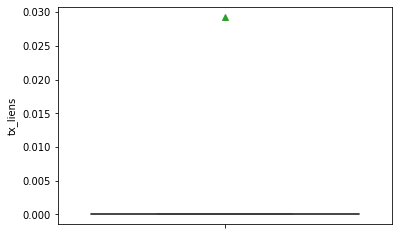

In [ ]:
sns.boxplot(y=df_loan["tx_liens"],showmeans=True,sym="")

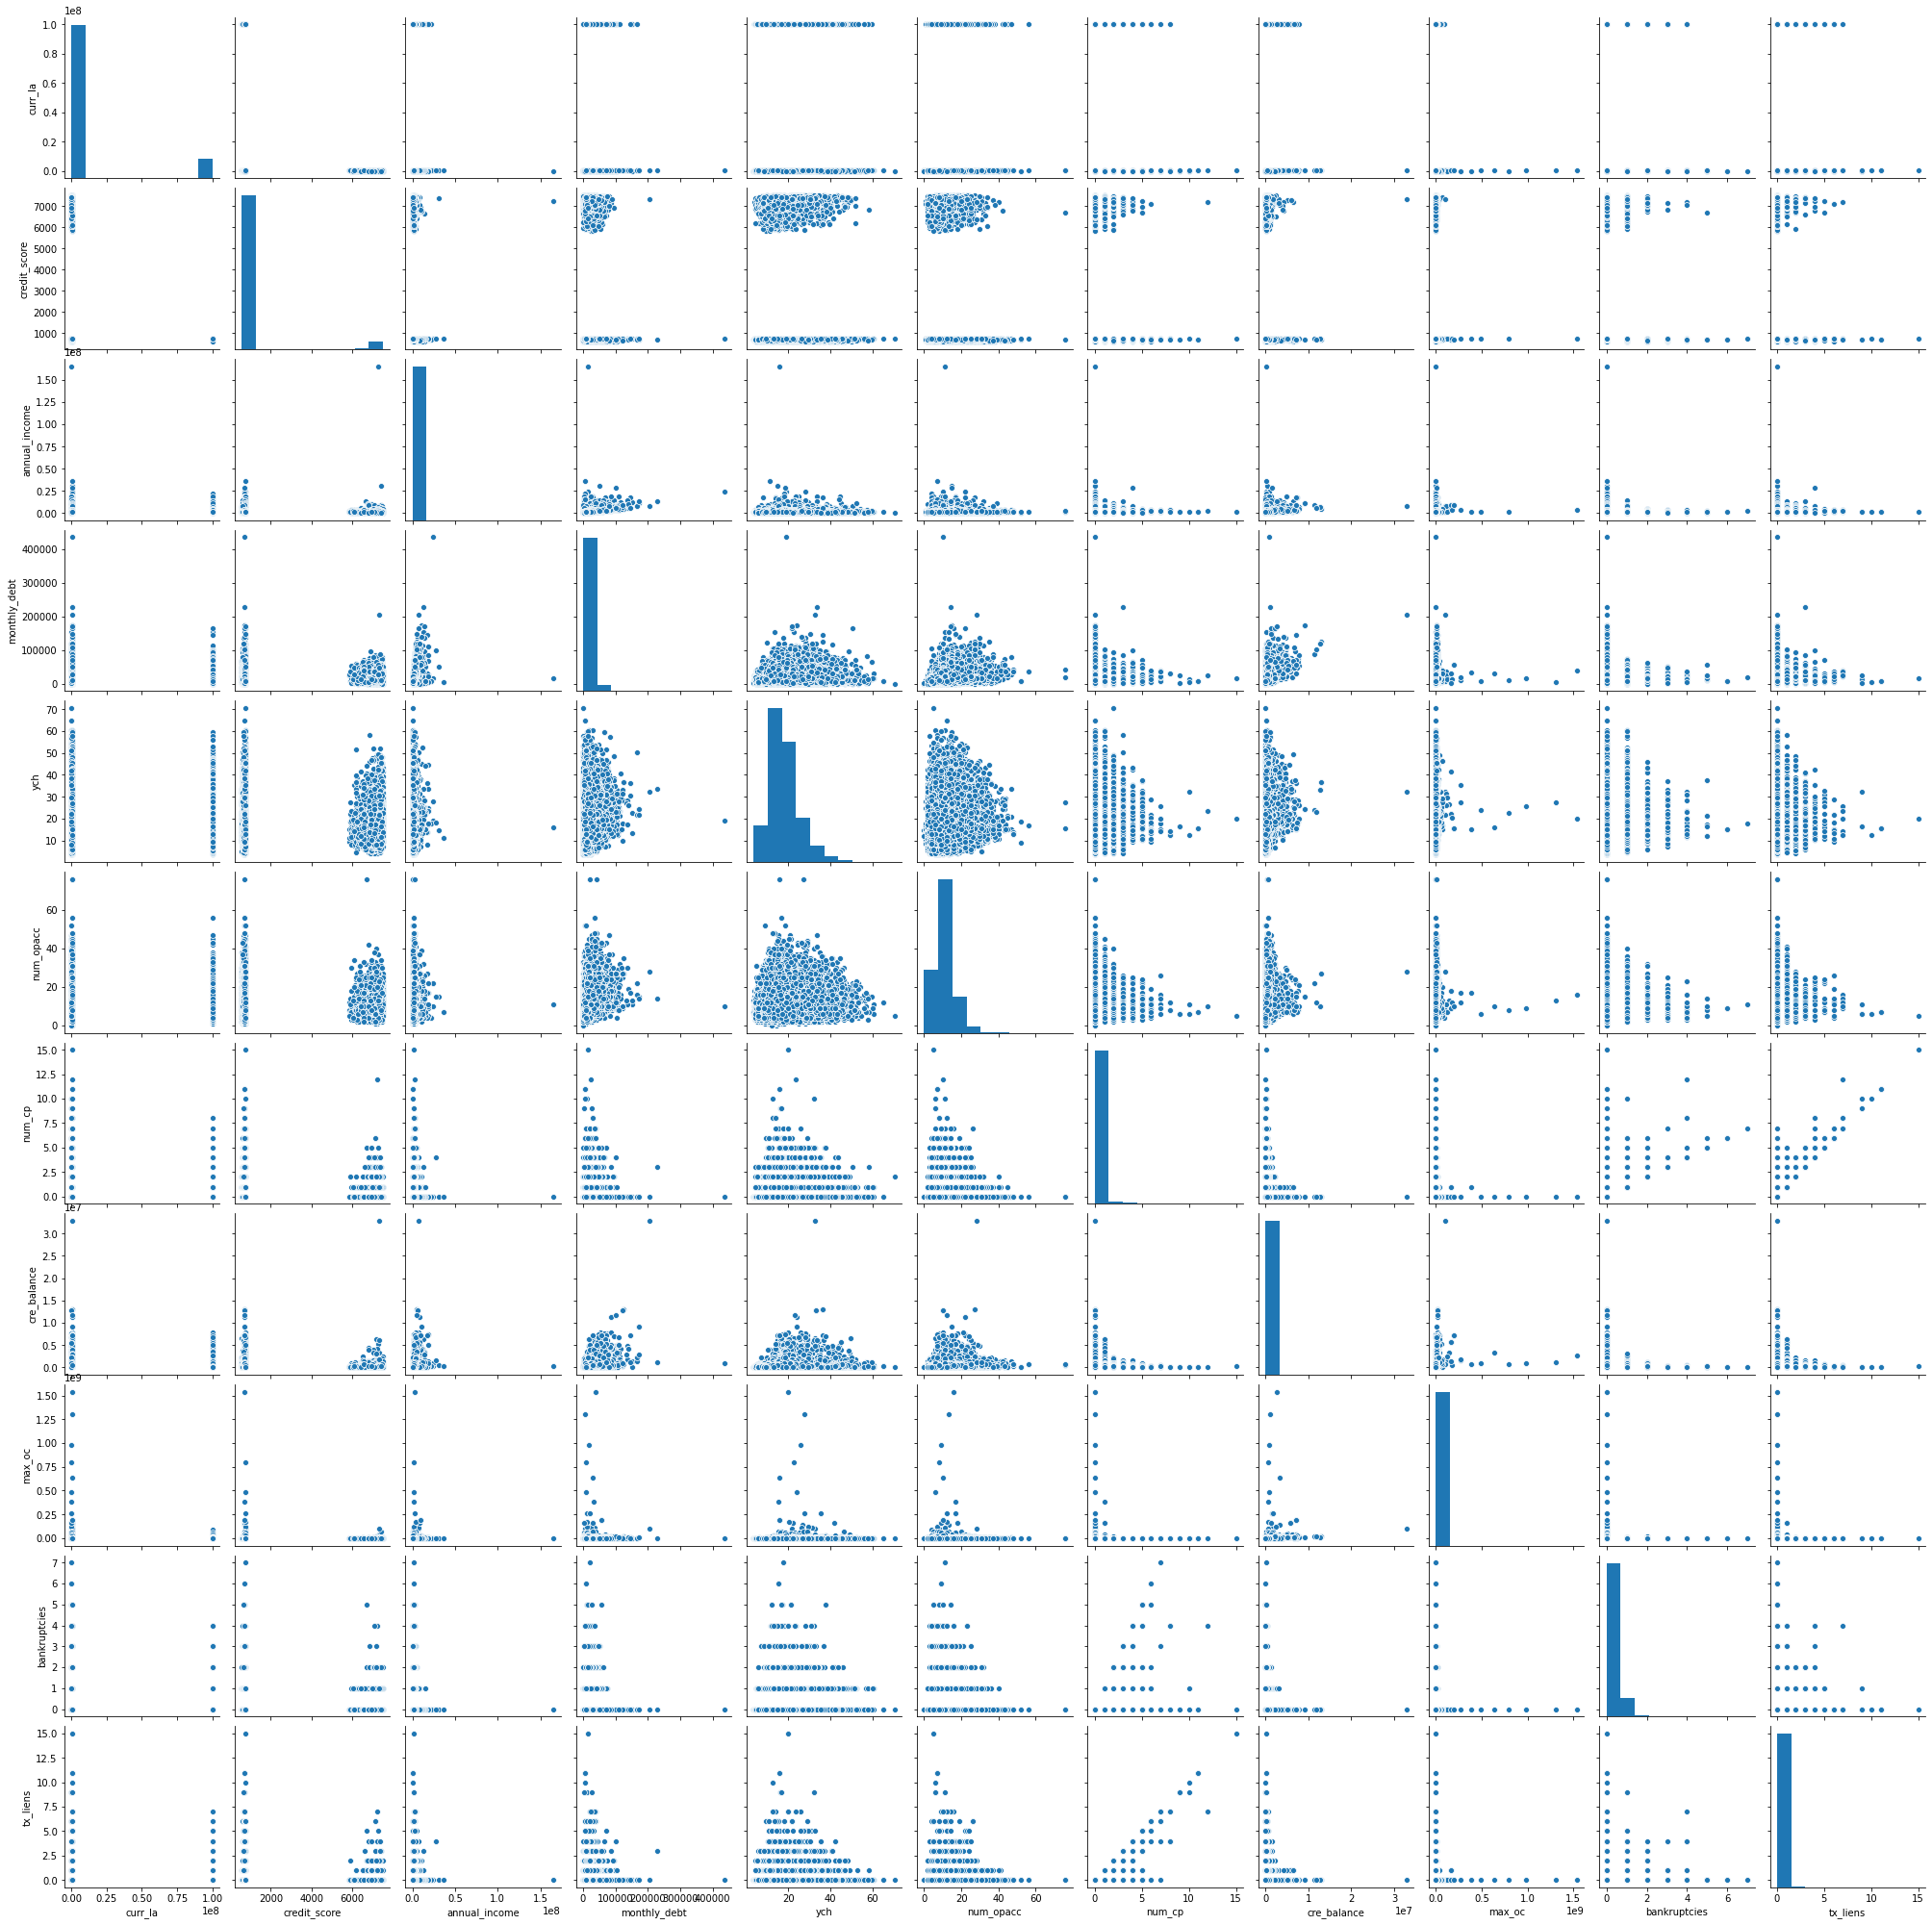

In [ ]:
sns.pairplot(df_loan)

## **Correlation Matrix**

In [ ]:
corr_df_loan=df_loan.corr()

In [ ]:

corr_df_loan

,curr_la,credit_score,annual_income,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc,bankruptcies,tx_liens
curr_la,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
credit_score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
annual_income,0.013112,-0.017078,1.000000,0.485230,0.161669,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
monthly_debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
ych,0.019282,-0.009720,0.161669,0.199289,1.000000,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
num_opacc,0.001478,0.006435,0.146175,0.411353,0.132349,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
num_cp,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
cre_balance,0.003880,-0.000104,0.312340,0.481348,0.208470,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
max_oc,-0.001271,-0.002827,0.053064,0.039268,0.031124,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029
bankruptcies,-0.000608,-0.006935,-0.047672,-0.078979,0.066247,-0.024575,0.752942,-0.122603,-0.014574,1.000000,0.046110


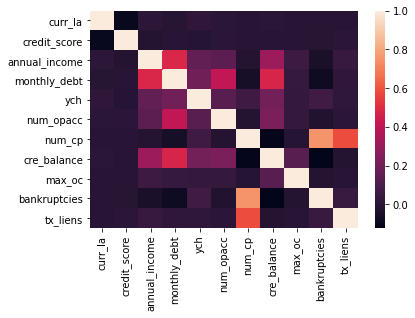

In [ ]:
sns.heatmap(corr_df_loan)

# **Handling missing values with drop all null values**

In [ ]:
loan_null=df_loan.copy()

In [ ]:
# drop all null values

loan_null=loan_null.dropna(axis=0, how='any', thresh=None, subset=None)  

In [ ]:
loan_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ls              77271 non-null  object 
 1   curr_la         77271 non-null  float64
 2   term            77271 non-null  object 
 3   credit_score    77271 non-null  float64
 4   annual_income   77271 non-null  float64
 5   years_curr_job  77271 non-null  object 
 6   home_ownership  77271 non-null  object 
 7   purpose         77271 non-null  object 
 8   monthly_debt    77271 non-null  float64
 9   ych             77271 non-null  float64
 10  num_opacc       77271 non-null  float64
 11  num_cp          77271 non-null  float64
 12  cre_balance     77271 non-null  float64
 13  max_oc          77271 non-null  float64
 14  bankruptcies    77271 non-null  float64
 15  tx_liens        77271 non-null  float64
dtypes: float64(11), object(5)
memory usage: 10.0+ MB


In [ ]:
null_values=loan_null.isna().sum()/len(loan_null)
print(null_values)

ls                0.0
curr_la           0.0
term              0.0
credit_score      0.0
annual_income     0.0
years_curr_job    0.0
home_ownership    0.0
purpose           0.0
monthly_debt      0.0
ych               0.0
num_opacc         0.0
num_cp            0.0
cre_balance       0.0
max_oc            0.0
bankruptcies      0.0
tx_liens          0.0
dtype: float64


## **Analysis of data**

### **Categorical Columns**

In [ ]:
loan_null["ls"].value_counts()

Fully Paid     61057
Charged Off    16214
Name: ls, dtype: int64

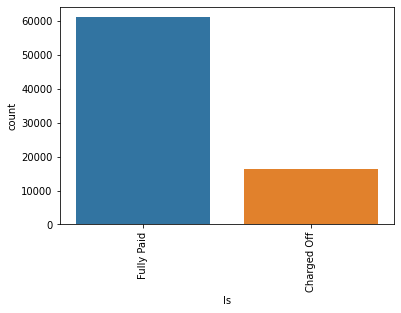

In [ ]:
sns.countplot(data=loan_null, x='ls')
plt.xticks(rotation=90)
plt.show()

**"term"**

In [ ]:
loan_null["term"].value_counts()/loan_null.shape[0]

Short Term    0.708377
Long Term     0.291623
Name: term, dtype: float64

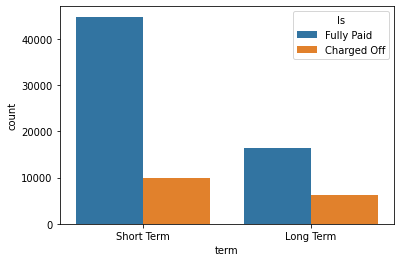

In [ ]:
sns.countplot(x="term",hue="ls",data=loan_null)

In [ ]:
pd.crosstab(loan_null["ls"],loan_null["term"],normalize="columns")

term,Long Term,Short Term
ls,,
Charged Off,0.276782,0.182272
Fully Paid,0.723218,0.817728


**"years_curr_job"**

In [ ]:
loan_null["years_curr_job"].value_counts()/loan_null.shape[0]

10+ years    0.327432
2 years      0.095288
3 years      0.085478
< 1 year     0.084495
5 years      0.070725
1 year       0.066713
4 years      0.063517
6 years      0.059104
7 years      0.058314
8 years      0.047896
9 years      0.041037
Name: years_curr_job, dtype: float64

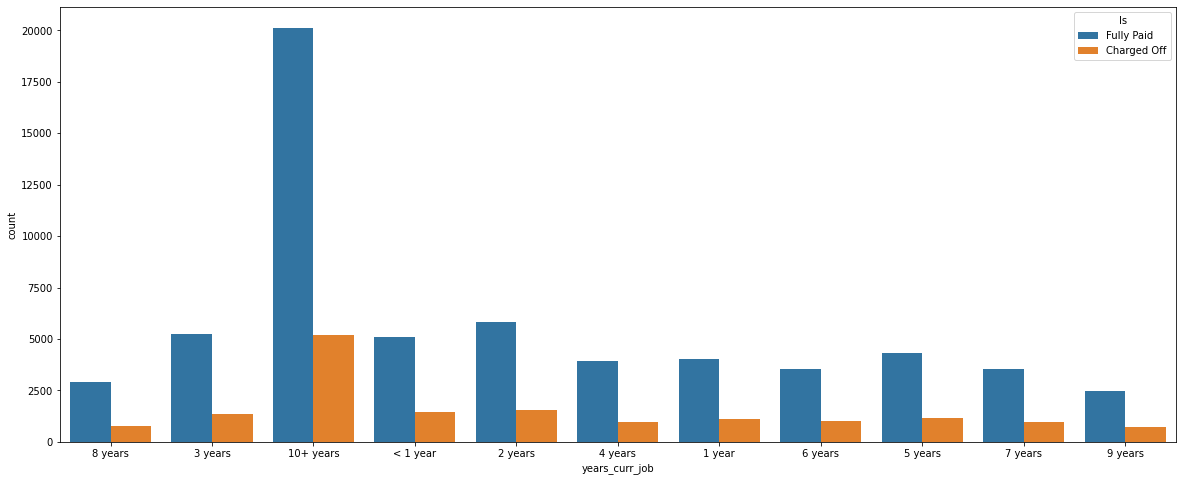

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x="years_curr_job",hue="ls",data=loan_null)

In [ ]:
pd.crosstab(loan_null["ls"],loan_null["years_curr_job"],normalize="columns")

years_curr_job,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
ls,,,,,,,,,,,
Charged Off,0.216101,0.204498,0.208067,0.203482,0.200896,0.213724,0.2194,0.213271,0.214537,0.221066,0.220248
Fully Paid,0.783899,0.795502,0.791933,0.796518,0.799104,0.786276,0.7806,0.786729,0.785463,0.778934,0.779752


**"home_ownership"**

In [ ]:
loan_null["home_ownership"].value_counts()/loan_null.shape[0]

Home Mortgage    0.485201
Rent             0.424040
Own Home         0.088455
HaveMortgage     0.002304
Name: home_ownership, dtype: float64

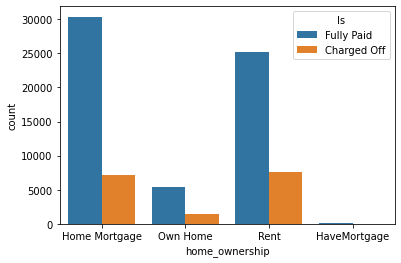

In [ ]:
sns.countplot(x="home_ownership",hue="ls",data=loan_null)

In [ ]:
pd.crosstab(loan_null["ls"],loan_null["home_ownership"],normalize="columns")

home_ownership,HaveMortgage,Home Mortgage,Own Home,Rent
ls,,,,
Charged Off,0.123596,0.190121,0.212875,0.232222
Fully Paid,0.876404,0.809879,0.787125,0.767778


In [ ]:
###
#def encodenp(pnc):
  #if pnc == "HaveMortgage":
   # return "Home Mortgage"
  #elif pnc == "Rent":
   # return "Rent"
  #elif pnc == "Home Mortgage":
  #  return "Home Mortgage"  
 # elif pnc == "Own Home":
#    return "Own Home"  


In [ ]:
#loan_null["home_ownership"]=loan_null["home_ownership"].apply(encodenp)
#loan_null["home_ownership"]=loan_null["home_ownership"].apply(encodenp)
#loan_null["home_ownership"].value_counts()/loan_null.shape[0]

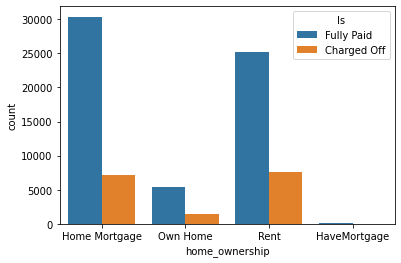

In [ ]:
sns.countplot(x="home_ownership",hue="ls",data=loan_null)

In [ ]:
pd.crosstab(loan_null["ls"],loan_null["home_ownership"],normalize="columns")

home_ownership,HaveMortgage,Home Mortgage,Own Home,Rent
ls,,,,
Charged Off,0.123596,0.190121,0.212875,0.232222
Fully Paid,0.876404,0.809879,0.787125,0.767778


**"purpose"**

In [ ]:
loan_null["purpose"].value_counts()/loan_null.shape[0]

Debt Consolidation      0.785379
other                   0.060993
Home Improvements       0.057564
Other                   0.032664
Business Loan           0.015957
Buy a Car               0.012644
Medical Bills           0.011013
Buy House               0.007001
Take a Trip             0.005888
major_purchase          0.003455
small_business          0.002912
moving                  0.001501
wedding                 0.001100
Educational Expenses    0.000932
vacation                0.000893
renewable_energy        0.000104
Name: purpose, dtype: float64

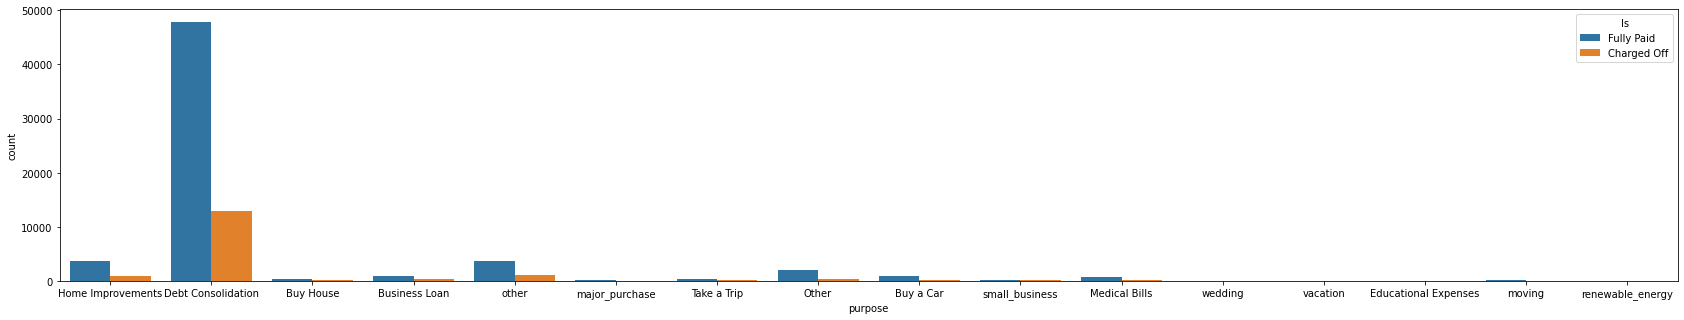

In [ ]:
plt.figure(figsize=(29,5))
sns.countplot(x="purpose",hue="ls",data=loan_null)

In [ ]:
pd.crosstab(loan_null["ls"],loan_null["purpose"],normalize="columns")

purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
ls,,,,,,,,,,,,,,,,
Charged Off,0.285483,0.197782,0.154555,0.212006,0.125,0.186376,0.220917,0.167591,0.169231,0.209738,0.267241,0.213877,0.25,0.377778,0.231884,0.164706
Fully Paid,0.714517,0.802218,0.845445,0.787994,0.875,0.813624,0.779083,0.832409,0.830769,0.790262,0.732759,0.786123,0.75,0.622222,0.768116,0.835294


## **Numerical Attribute visualization**

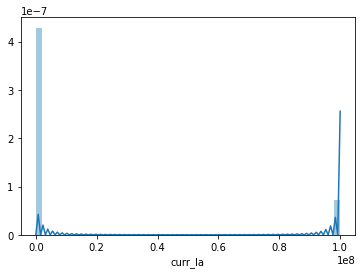

In [ ]:
#numerical attribute visualization
sns.distplot(loan_null["curr_la"])

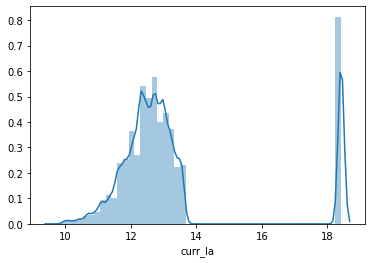

In [ ]:
#apply log transformation to the attribute
loan_null["curr_la"]=np.log(loan_null["curr_la"])
sns.distplot(loan_null["curr_la"])

credit score

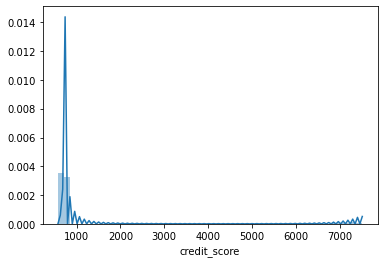

In [ ]:
sns.distplot(loan_null["credit_score"])

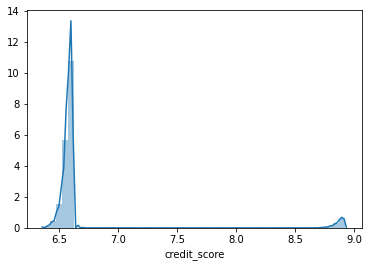

In [ ]:
#apply log transformation to the attribute
loan_null["credit_score"]=np.log(loan_null["credit_score"])
sns.distplot(loan_null["credit_score"])

**monthly_debt**

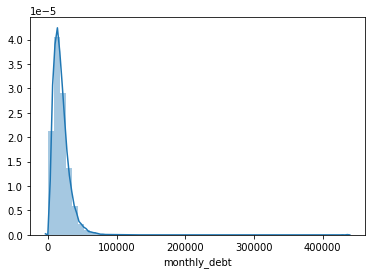

In [ ]:
sns.distplot(loan_null["monthly_debt"])

ych

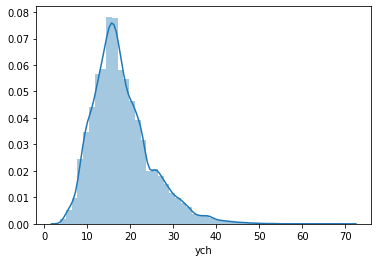

In [ ]:
sns.distplot(loan_null["ych"])

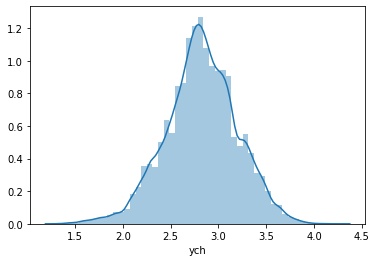

In [ ]:
#apply log transformation to the attribute
loan_null["ych"]=np.log(loan_null["ych"])
sns.distplot(loan_null["ych"])

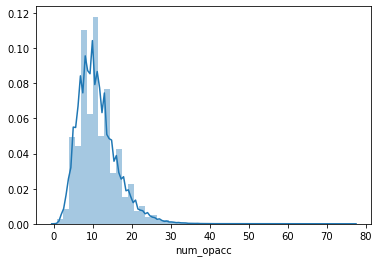

In [ ]:
sns.distplot(loan_null["num_opacc"])

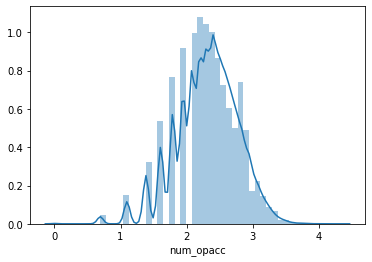

In [ ]:
#apply log transformation to the attribute
loan_null["num_opacc"]=np.log(loan_null["num_opacc"])
sns.distplot(loan_null["num_opacc"])

**num_cpa**

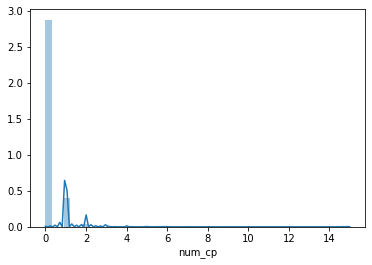

In [ ]:
sns.distplot(loan_null["num_cp"])

**cre_balance**

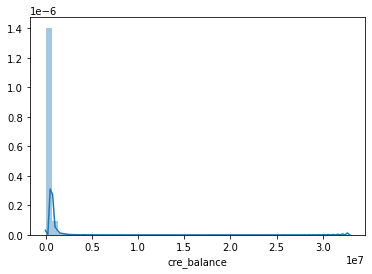

In [ ]:
sns.distplot(loan_null["cre_balance"])

**max_oc**

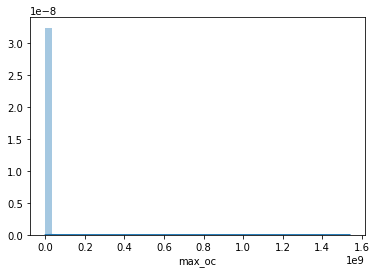

In [ ]:
sns.distplot(loan_null["max_oc"])

**bankruptcies**

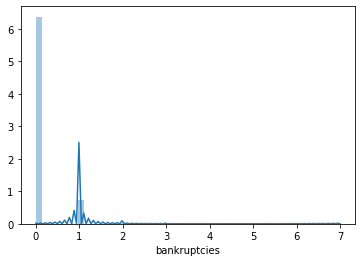

In [ ]:
sns.distplot(loan_null["bankruptcies"])

**tx_liens**

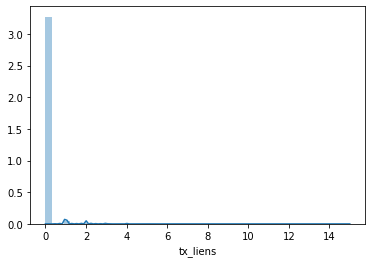

In [ ]:
sns.distplot(loan_null["tx_liens"])

### **Continuous Column**

**"curr_la"**

In [ ]:
np.round(loan_null.curr_la.describe(),2)

count    77271.00
mean        13.32
std          2.18
min          9.64
25%         12.17
50%         12.70
75%         13.22
max         18.42
Name: curr_la, dtype: float64

In [ ]:
loan_null.curr_la[loan_null.curr_la==99999999].shape

(0,)

In [ ]:
loan_null.shape

(77271, 16)

In [ ]:
ser=loan_null.curr_la[loan_null.curr_la != 99999999]

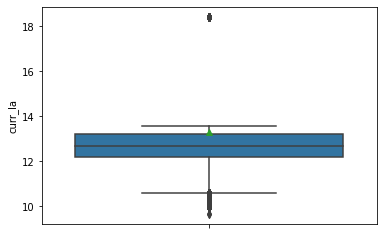

In [ ]:
sns.boxplot(y=ser,showmeans=True)

**credit_score**

In [ ]:
np.round(loan_null.credit_score.describe(),2)

count    77271.00
mean         6.70
std          0.53
min          6.37
25%          6.56
50%          6.58
75%          6.61
max          8.92
Name: credit_score, dtype: float64

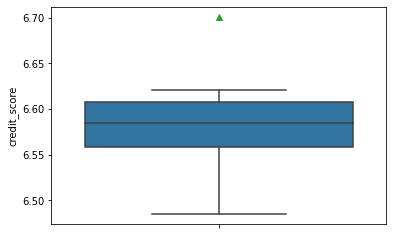

In [ ]:
sns.boxplot(y=loan_null["credit_score"],showmeans=True,sym="")

**"monthly_debt"**

In [ ]:
np.round(loan_null.monthly_debt.describe(),2)

count     77271.00
mean      18755.67
std       12292.18
min           0.00
25%       10478.50
50%       16475.28
75%       24302.33
max      435843.28
Name: monthly_debt, dtype: float64

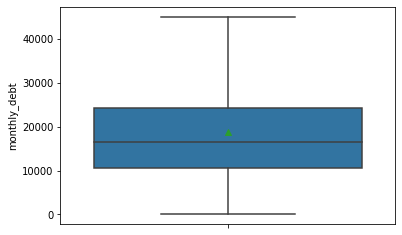

In [ ]:
sns.boxplot(y=loan_null["monthly_debt"],showmeans=True,sym="")

**"ych"**

In [ ]:
np.round(loan_null.ych.describe(),2)

count    77271.00
mean         2.82
std          0.38
min          1.31
25%          2.60
50%          2.82
75%          3.07
max          4.26
Name: ych, dtype: float64

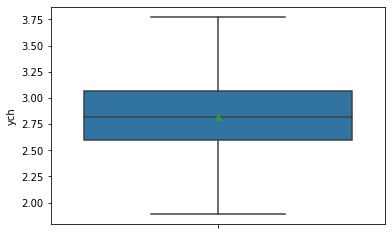

In [ ]:
sns.boxplot(y=loan_null["ych"],showmeans=True,sym="")

**"num_opacc"**

In [ ]:
np.round(loan_null.num_opacc.describe(),2)

count    77271.00
mean         2.32
std          0.46
min          0.00
25%          2.08
50%          2.30
75%          2.64
max          4.33
Name: num_opacc, dtype: float64

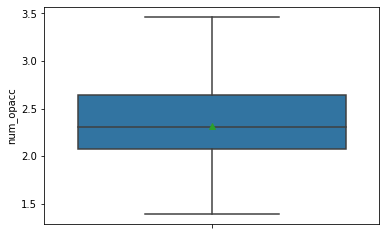

In [ ]:
sns.boxplot(y=loan_null["num_opacc"],showmeans=True,sym="")

**"num_cp"**

In [ ]:
np.round(loan_null.num_cp.describe(),2)

count    77271.00
mean         0.16
std          0.48
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         15.00
Name: num_cp, dtype: float64

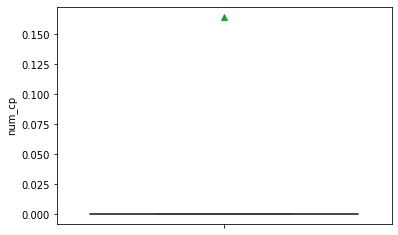

In [ ]:
sns.boxplot(y=loan_null["num_cp"],showmeans=True,sym="")

**"cre_balance"**

In [ ]:
np.round(loan_null.cre_balance.describe(),2)

count       77271.00
mean       297565.40
std        384575.36
min             0.00
25%        114351.50
50%        212724.00
75%        371269.50
max      32878968.00
Name: cre_balance, dtype: float64

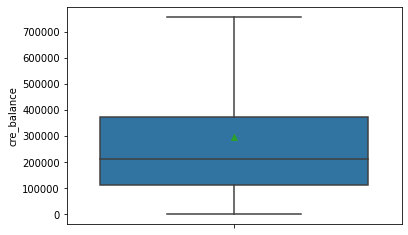

In [ ]:
sns.boxplot(y=loan_null["cre_balance"],showmeans=True,sym="")

**"max_oc"**

In [ ]:
np.round(loan_null.max_oc.describe(),2)

count    7.727100e+04
mean     7.395510e+05
std      7.038667e+06
min      0.000000e+00
25%      2.746260e+05
50%      4.697000e+05
75%      7.839040e+05
max      1.539738e+09
Name: max_oc, dtype: float64

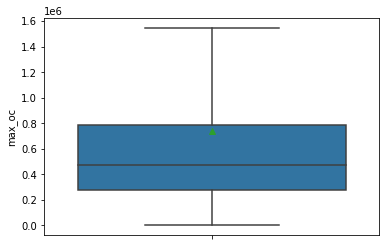

In [ ]:
sns.boxplot(y=loan_null["max_oc"],showmeans=True,sym="")

**"bankruptcies"**

In [ ]:
np.round(loan_null.bankruptcies.describe(),2)

count    77271.00
mean         0.11
std          0.35
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          7.00
Name: bankruptcies, dtype: float64

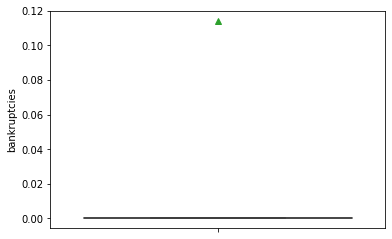

In [ ]:
sns.boxplot(y=loan_null["bankruptcies"],showmeans=True,sym="")

**"tx_liens"**

In [ ]:
np.round(loan_null.tx_liens.describe(),2)

count    77271.00
mean         0.03
std          0.26
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         15.00
Name: tx_liens, dtype: float64

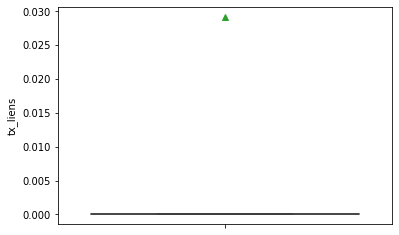

In [ ]:
sns.boxplot(y=loan_null["tx_liens"],showmeans=True,sym="")

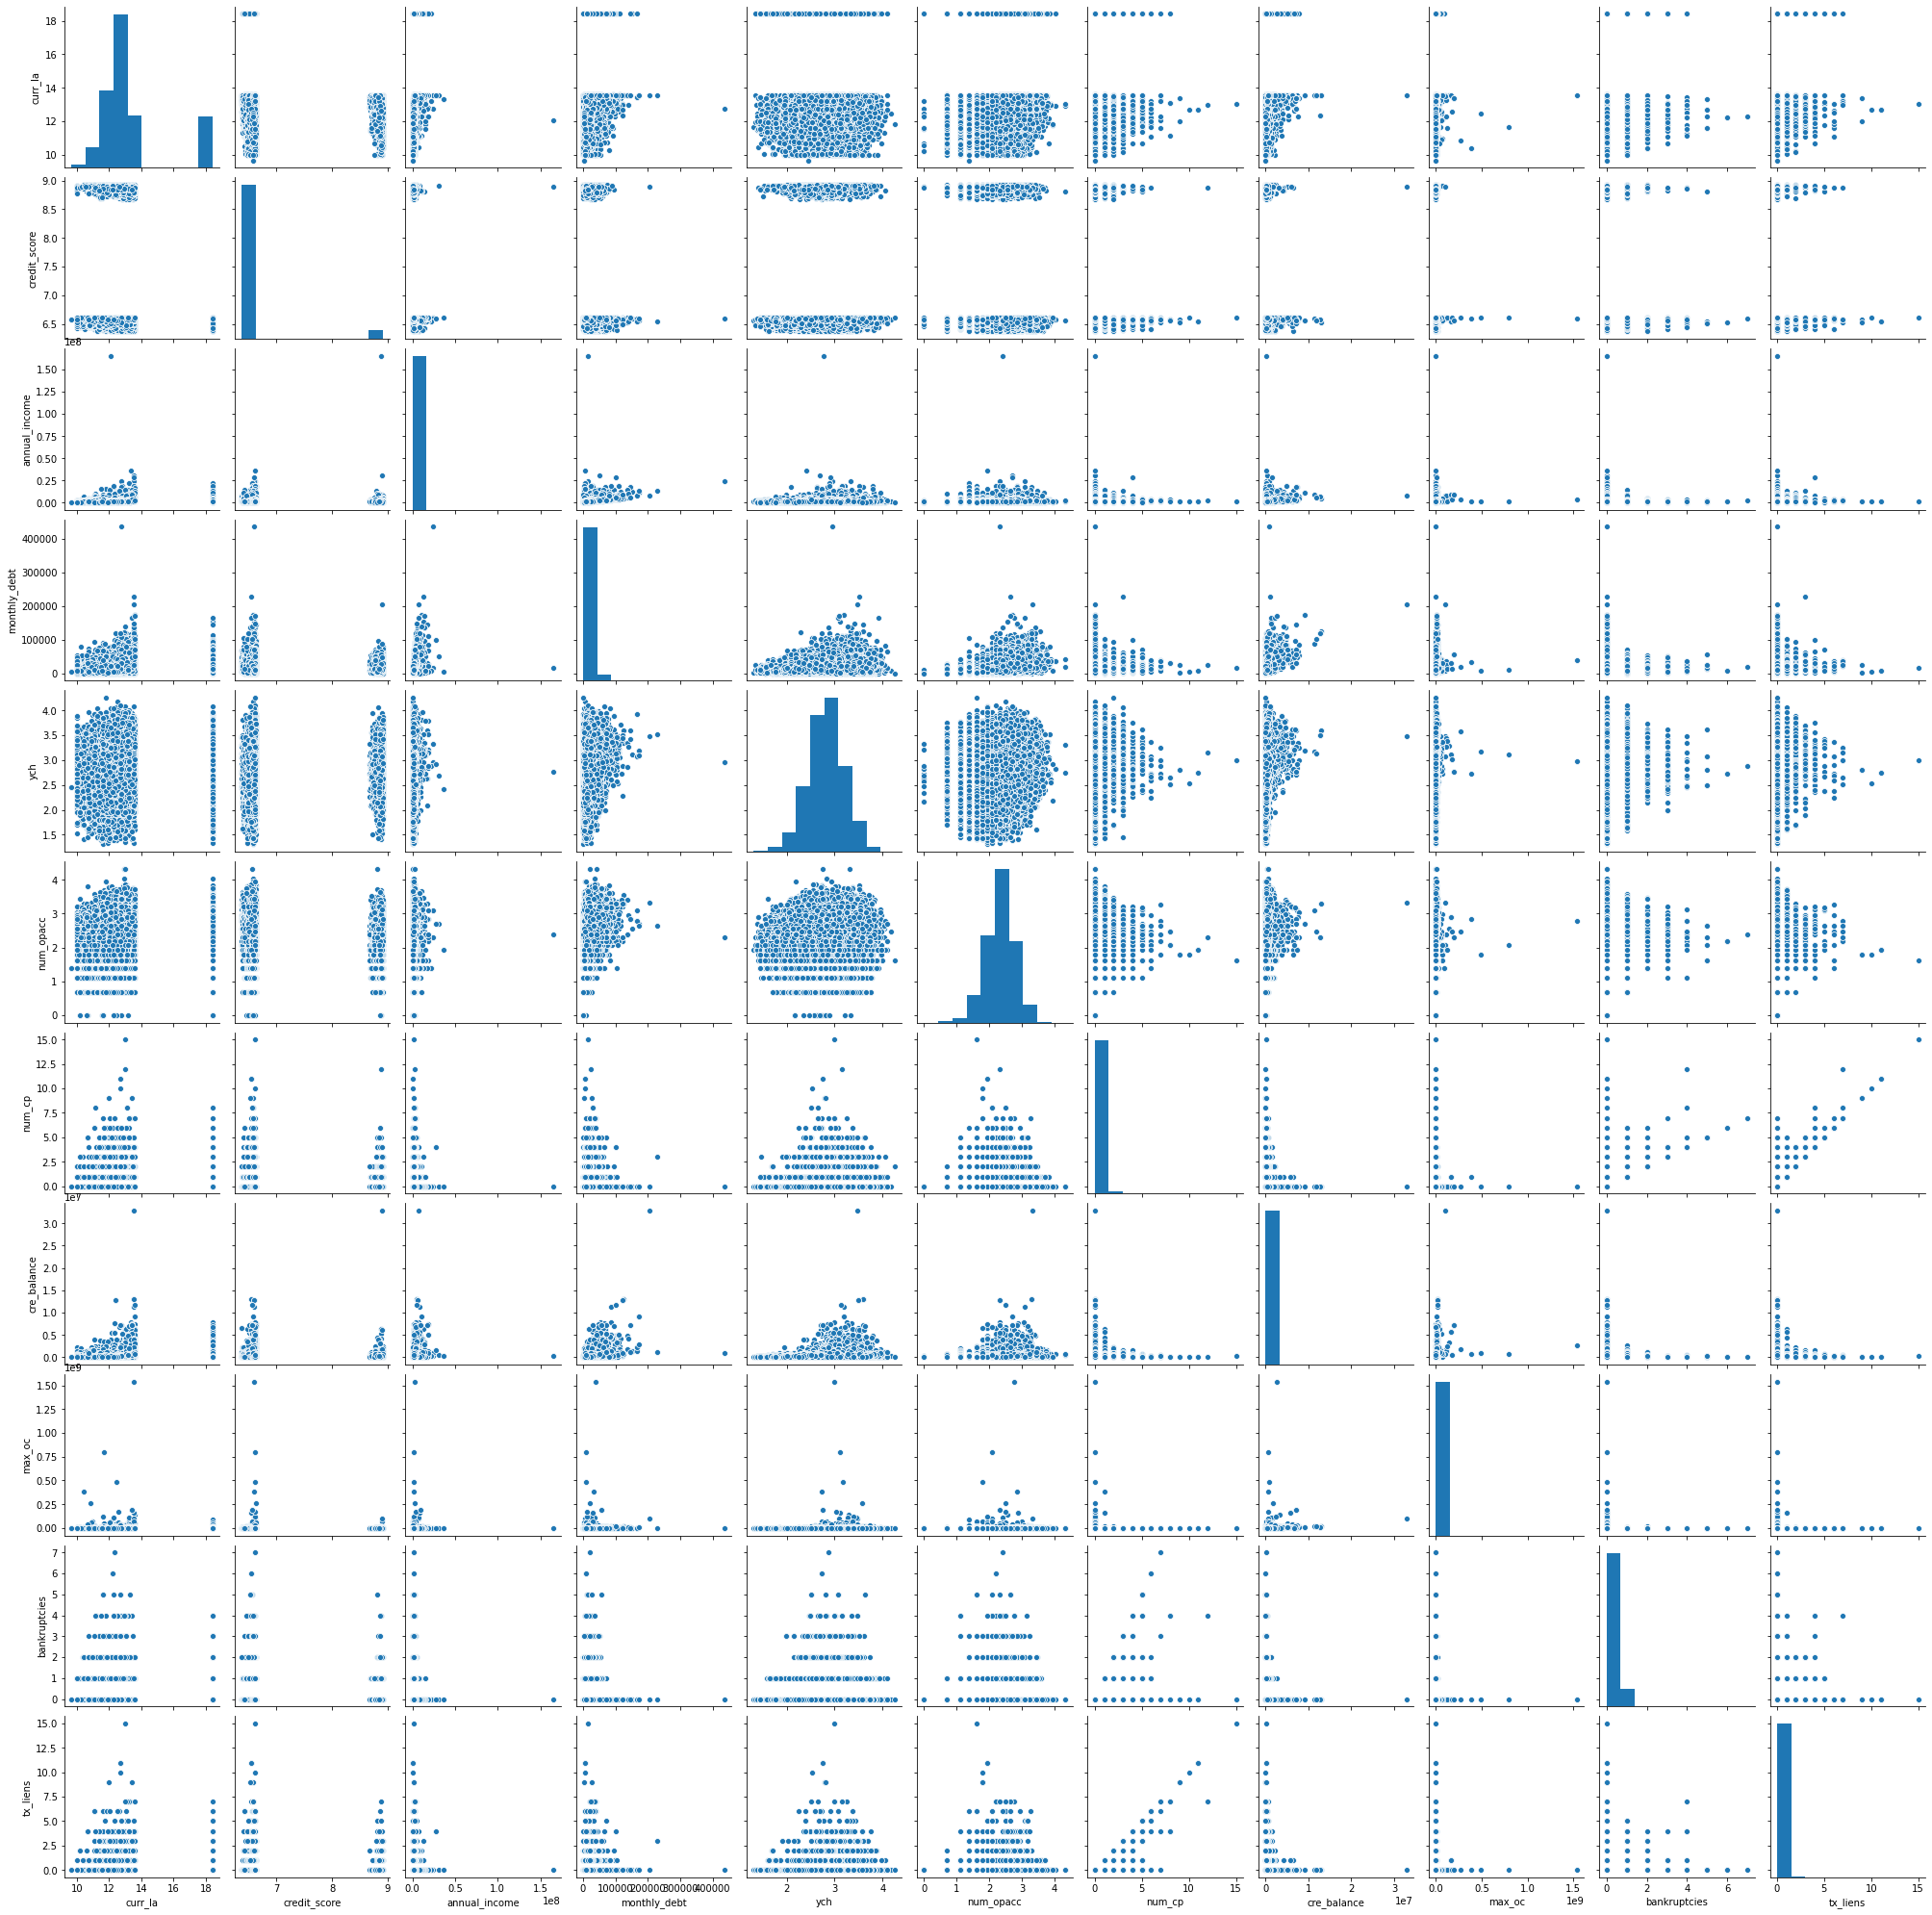

In [ ]:
sns.pairplot(loan_null)

## **Correlation Matrix**

In [ ]:
corr_loan_null=loan_null.corr()

In [ ]:
corr_loan_null

,curr_la,credit_score,annual_income,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc,bankruptcies,tx_liens
curr_la,1.000000,-0.081806,0.092475,0.090779,0.068684,0.060361,-0.020400,0.078676,0.008141,-0.022558,0.000847
credit_score,-0.081806,1.000000,-0.015487,-0.004842,-0.008564,0.007806,-0.004712,-0.000667,-0.002036,-0.008723,0.005062
annual_income,0.092475,-0.015487,1.000000,0.479413,0.188805,0.143340,-0.010690,0.309882,0.051822,-0.041730,0.042992
monthly_debt,0.090779,-0.004842,0.479413,1.000000,0.236194,0.423658,-0.048479,0.482657,0.050773,-0.071640,0.022154
ych,0.068684,-0.008564,0.188805,0.236194,1.000000,0.160909,0.068540,0.217228,0.034072,0.072564,0.019616
num_opacc,0.060361,0.007806,0.143340,0.423658,0.160909,1.000000,-0.000296,0.229586,0.036866,-0.006010,0.006243
num_cp,-0.020400,-0.004712,-0.010690,-0.048479,0.068540,-0.000296,1.000000,-0.107871,-0.012311,0.747955,0.589901
cre_balance,0.078676,-0.000667,0.309882,0.482657,0.217228,0.229586,-0.107871,1.000000,0.160460,-0.118826,-0.014511
max_oc,0.008141,-0.002036,0.051822,0.050773,0.034072,0.036866,-0.012311,0.160460,1.000000,-0.015909,-0.000618
bankruptcies,-0.022558,-0.008723,-0.041730,-0.071640,0.072564,-0.006010,0.747955,-0.118826,-0.015909,1.000000,0.046844


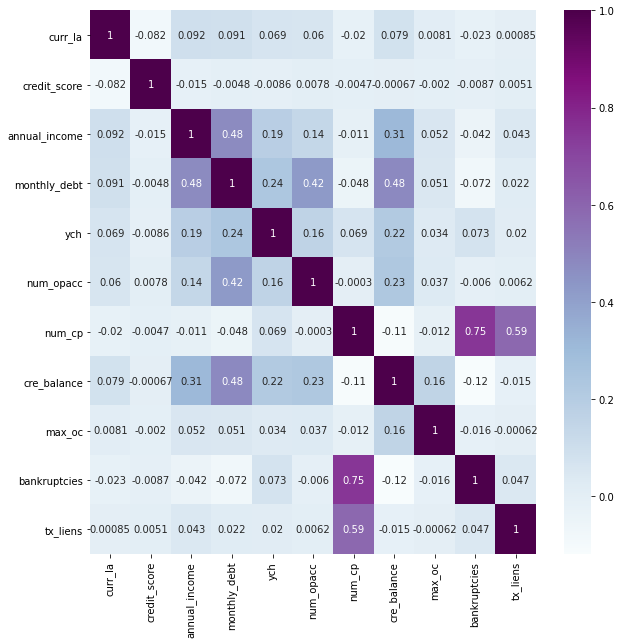

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
plt.figure(figsize=(10,10))
sns.heatmap(corr_loan_null, annot= True, cmap="BuPu")

In [ ]:
loan_null.head()

,ls,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc,bankruptcies,tx_liens
0,Fully Paid,13.006755,Short Term,6.563856,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,2.844909,1.791759,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,18.420681,Short Term,6.608001,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,2.701361,2.890372,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,12.758998,Long Term,6.580639,806949.0,3 years,Own Home,Debt Consolidation,8741.90,2.484907,2.197225,0.0,256329.0,386958.0,0.0,0.0
5,Charged Off,12.238550,Short Term,8.894259,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,2.850707,1.791759,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,12.290625,Short Term,6.593045,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,2.975530,2.564949,1.0,122170.0,272052.0,1.0,0.0


# **Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=["ls","term","years_curr_job","home_ownership","purpose"]
le=LabelEncoder()
for col in cols:
  loan_null[col]=le.fit_transform(loan_null[col])

In [ ]:
loan_null.head

<bound method NDFrame.head of        ls    curr_la  term  ...    max_oc  bankruptcies  tx_liens
0       1  13.006755     1  ...  416746.0           1.0       0.0
2       1  18.420681     1  ...  750090.0           0.0       0.0
3       1  12.758998     0  ...  386958.0           0.0       0.0
5       0  12.238550     1  ...  272448.0           0.0       0.0
6       1  12.290625     1  ...  272052.0           1.0       0.0
...    ..        ...   ...  ...       ...           ...       ...
99994   1  12.257640     1  ...  259160.0           0.0       0.0
99995   1  11.898664     1  ...  658548.0           0.0       0.0
99996   1  18.420681     1  ...  509234.0           0.0       0.0
99997   1  11.543804     1  ...  537548.0           1.0       0.0
99998   1  13.181259     1  ...  738254.0           0.0       0.0

[77271 rows x 16 columns]>

## **Variable Encoding**

In [ ]:
loan_null["ls"].value_counts()

1    61057
0    16214
Name: ls, dtype: int64

In [ ]:
#loan_null["ls"]=loan_null["ls"].map({'Fully Paid':int('0'),'Charged Off':int('1')})

In [ ]:
#loan_null["ls"].value_counts()

In [ ]:
loan_null["term"].value_counts()

1    54737
0    22534
Name: term, dtype: int64

In [ ]:
#mean encoding
#Mean_encoded_subject = loan_null.groupby(['term'])['ls'].mean().to_dict() 
#loan_null['term'] =loan_null['term'].map(Mean_encoded_subject) 

#numerical encoing
#loan_null["term"]=loan_null["term"].map({'Short Term':int('0'),'Long Term':int('1')})


In [ ]:
loan_null["term"].value_counts()

1    54737
0    22534
Name: term, dtype: int64

In [ ]:
#loan_null["years_curr_job"].value_counts()

In [ ]:
##mean encoding
#Mean_encoded_subject = loan_null.groupby(['years_curr_job'])['ls'].mean().to_dict() 
#loan_null['years_curr_job'] = loan_null['years_curr_job'].map(Mean_encoded_subject) 

##numerical encoding
#loan_null["years_curr_job"]=loan_null["years_curr_job"].map({'10+ years':int('0'),'2 years':int('1'),'3 years':int('2'),'< 1 year':int('3'),'5 years':int('4'),'1 year':int('5'),'4 years':int('6'),'6 years':int('7'),'7 years':int('8'),'8 years':int('9'),'9 years':int('10')})


In [ ]:
loan_null["years_curr_job"].value_counts()

1     25301
2      7363
3      6605
10     6529
5      5465
0      5155
4      4908
6      4567
7      4506
8      3701
9      3171
Name: years_curr_job, dtype: int64

In [ ]:
loan_null["home_ownership"].value_counts()

1    37492
3    32766
2     6835
0      178
Name: home_ownership, dtype: int64

In [ ]:
##numerical encoding
#loan_null["home_ownership"]=loan_null["home_ownership"].map({'Home Mortgage':int('0'),'Rent':int('1'),'Own Home':int('2'),'HaveMortgage':int('0')})

#mean encoding
#Mean_encoded_subject = loan_null.groupby(['home_ownership'])['ls'].mean().to_dict() 
#loan_null['home_ownership'] = loan_null['home_ownership'].map(Mean_encoded_subject) 


  

In [ ]:
#loan_null["home_ownership"].value_counts()

In [ ]:
loan_null["purpose"].value_counts()/loan_null.shape[0]

3     0.785379
11    0.060993
5     0.057564
7     0.032664
0     0.015957
2     0.012644
6     0.011013
1     0.007001
8     0.005888
9     0.003455
13    0.002912
10    0.001501
15    0.001100
4     0.000932
14    0.000893
12    0.000104
Name: purpose, dtype: float64

In [ ]:
## numerical encoding
#loan_null["purpose"]=loan_null["purpose"].map({'Debt Consolidation':int('0'),'other':int('1'),'Home Improvements':int('2'),'Other':int('1'),'Business Loan':int('3'),'Buy a Car':int('4'),'Medical Bills':int('5'),'Buy House':int('6'),'Take a Trip':int('7'),'major_purchase':int('8'),'small_business':int('9'),'moving':int('10'),'wedding':int('11'),'vacation':int('7'),'Educational Expenses':int('12'),'renewable_energy':int('13')})


## mean encoding
#Mean_encoded_subject = loan_null.groupby(['purpose'])['ls'].mean().to_dict() 
#loan_null['purpose'] = loan_null['purpose'].map(Mean_encoded_subject) 




In [ ]:
loan_null["purpose"].value_counts()/loan_null.shape[0]

3     0.785379
11    0.060993
5     0.057564
7     0.032664
0     0.015957
2     0.012644
6     0.011013
1     0.007001
8     0.005888
9     0.003455
13    0.002912
10    0.001501
15    0.001100
4     0.000932
14    0.000893
12    0.000104
Name: purpose, dtype: float64

In [ ]:
loan_null.dtypes

ls                  int64
curr_la           float64
term                int64
credit_score      float64
annual_income     float64
years_curr_job      int64
home_ownership      int64
purpose             int64
monthly_debt      float64
ych               float64
num_opacc         float64
num_cp            float64
cre_balance       float64
max_oc            float64
bankruptcies      float64
tx_liens          float64
dtype: object

In [ ]:
loan_null.describe()

,ls,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc,bankruptcies,tx_liens
count,77271.000000,77271.000000,77271.000000,77271.000000,7.727100e+04,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,7.727100e+04,7.727100e+04,77271.000000,77271.000000
mean,0.790167,13.315797,0.708377,6.701188,1.399186e+06,3.742413,1.934231,3.806939,18755.666828,2.820439,2.316471,0.164641,2.975654e+05,7.395510e+05,0.114299,0.029196
std,0.407192,2.178458,0.454513,0.527185,1.094465e+06,3.175023,0.956108,2.280538,12292.178511,0.375217,0.457295,0.481352,3.845754e+05,7.038667e+06,0.347270,0.262642
min,0.000000,9.643550,0.000000,6.371612,7.662700e+04,0.000000,0.000000,0.000000,0.000000,1.308333,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,12.171217,0.000000,6.558198,8.625050e+05,1.000000,1.000000,3.000000,10478.500000,2.595255,2.079442,0.000000,1.143515e+05,2.746260e+05,0.000000,0.000000
50%,1.000000,12.697605,1.000000,6.584791,1.202263e+06,3.000000,2.000000,3.000000,16475.280000,2.821379,2.302585,0.000000,2.127240e+05,4.697000e+05,0.000000,0.000000
75%,1.000000,13.223258,1.000000,6.608001,1.677339e+06,6.000000,3.000000,3.000000,24302.330000,3.068053,2.639057,0.000000,3.712695e+05,7.839040e+05,0.000000,0.000000
max,1.000000,18.420681,1.000000,8.923991,1.655574e+08,10.000000,3.000000,15.000000,435843.280000,4.255613,4.330733,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
loan_null.info()
loan_null.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ls              77271 non-null  int64  
 1   curr_la         77271 non-null  float64
 2   term            77271 non-null  int64  
 3   credit_score    77271 non-null  float64
 4   annual_income   77271 non-null  float64
 5   years_curr_job  77271 non-null  int64  
 6   home_ownership  77271 non-null  int64  
 7   purpose         77271 non-null  int64  
 8   monthly_debt    77271 non-null  float64
 9   ych             77271 non-null  float64
 10  num_opacc       77271 non-null  float64
 11  num_cp          77271 non-null  float64
 12  cre_balance     77271 non-null  float64
 13  max_oc          77271 non-null  float64
 14  bankruptcies    77271 non-null  float64
 15  tx_liens        77271 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 12.5 MB


(77271, 16)

## **Outlier Detection**

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(loan_null))
print(z)

[[5.15320422e-01 1.41863598e-01 6.41621118e-01 ... 4.58619641e-02
  2.55048121e+00 1.11163386e-01]
 [5.15320422e-01 2.34336234e+00 6.41621118e-01 ... 1.49730962e-03
  3.29137626e-01 1.11163386e-01]
 [5.15320422e-01 2.55594975e-01 1.55855219e+00 ... 5.00940428e-02
  3.29137626e-01 1.11163386e-01]
 ...
 [5.15320422e-01 2.34336234e+00 6.41621118e-01 ... 3.27218910e-02
  3.29137626e-01 1.11163386e-01]
 [5.15320422e-01 8.13421429e-01 6.41621118e-01 ... 2.86992283e-02
  2.55048121e+00 1.11163386e-01]
 [5.15320422e-01 6.17589353e-02 6.41621118e-01 ... 1.84269657e-04
  3.29137626e-01 1.11163386e-01]]


In [ ]:
upper_limit=loan_null.mean()+3*loan_null.std()
upper_limit

ls                2.011743e+00
curr_la           1.985117e+01
term              2.071915e+00
credit_score      8.282743e+00
annual_income     4.682581e+06
years_curr_job    1.326748e+01
home_ownership    4.802555e+00
purpose           1.064855e+01
monthly_debt      5.563220e+04
ych               3.946091e+00
num_opacc         3.688357e+00
num_cp            1.608697e+00
cre_balance       1.451291e+06
max_oc            2.185555e+07
bankruptcies      1.156110e+00
tx_liens          8.171209e-01
dtype: float64

In [ ]:
lower_limit=loan_null.mean()-3*loan_null.std()
lower_limit

ls               -4.314085e-01
curr_la           6.780422e+00
term             -6.551608e-01
credit_score      5.119633e+00
annual_income    -1.884208e+06
years_curr_job   -5.782655e+00
home_ownership   -9.340920e-01
purpose          -3.034674e+00
monthly_debt     -1.812087e+04
ych               1.694787e+00
num_opacc         9.445859e-01
num_cp           -1.279414e+00
cre_balance      -8.561607e+05
max_oc           -2.037645e+07
bankruptcies     -9.275123e-01
tx_liens         -7.587290e-01
dtype: float64

In [ ]:
loan_null[(loan_null>upper_limit)|(loan_null<lower_limit)]

,ls,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc,bankruptcies,tx_liens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,8.894259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_null_no_outlier_std_dev=loan_null[(loan_null<upper_limit)&(loan_null>lower_limit)]
loan_null_no_outlier_std_dev.shape

(77271, 16)

In [ ]:
loan_null.shape

(77271, 16)

In [ ]:
null_values1=loan_null.isna().sum()/len(loan_null)
print(null_values1)

ls                0.0
curr_la           0.0
term              0.0
credit_score      0.0
annual_income     0.0
years_curr_job    0.0
home_ownership    0.0
purpose           0.0
monthly_debt      0.0
ych               0.0
num_opacc         0.0
num_cp            0.0
cre_balance       0.0
max_oc            0.0
bankruptcies      0.0
tx_liens          0.0
dtype: float64


## **Find X and Y**

In [ ]:
# Find x1(features) and y1(target)

x1=loan_null.drop(["ls","tx_liens","bankruptcies"],axis=1)
y1=loan_null["ls"]

In [ ]:
x1.head()

,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc
0,13.006755,1,6.563856,1167493.0,8,1,5,5214.74,2.844909,1.791759,1.0,228190.0,416746.0
2,18.420681,1,6.608001,2231892.0,8,2,3,29200.53,2.701361,2.890372,1.0,297996.0,750090.0
3,12.758998,0,6.580639,806949.0,3,2,3,8741.90,2.484907,2.197225,0.0,256329.0,386958.0
5,12.238550,1,8.894259,896857.0,1,1,3,16367.74,2.850707,1.791759,0.0,215308.0,272448.0
6,12.290625,1,6.593045,1184194.0,10,1,3,10855.08,2.975530,2.564949,1.0,122170.0,272052.0


In [ ]:
x1=x1.apply(lambda x: (x - x.min(axis=0) ) / (x.max(axis=0) - x.min(axis=0)))

In [ ]:
x1.head()

,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc
0,0.383178,1.0,0.075319,0.006592,0.8,0.333333,0.333333,0.011965,0.521354,0.413731,0.066667,0.006940,0.000271
2,1.000000,1.0,0.092615,0.013024,0.8,0.666667,0.200000,0.066998,0.472649,0.667409,0.066667,0.009063,0.000487
3,0.354951,0.0,0.081895,0.004413,0.3,0.666667,0.200000,0.020057,0.399207,0.507356,0.000000,0.007796,0.000251
5,0.295655,1.0,0.988351,0.004957,0.1,0.333333,0.200000,0.037554,0.523321,0.413731,0.000000,0.006549,0.000177
6,0.301588,1.0,0.086755,0.006693,1.0,0.333333,0.200000,0.024906,0.565673,0.592267,0.066667,0.003716,0.000177


## **Correlation Matrix**

In [ ]:
corr_loan_null=x1.corr()

In [ ]:
corr_loan_null

,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc
curr_la,1.000000,-0.041603,-0.081806,0.092475,-0.014079,-0.061039,-0.068260,0.090779,0.068684,0.060361,-0.020400,0.078676,0.008141
term,-0.041603,1.000000,-0.014513,-0.080205,0.025304,0.118676,0.056267,-0.156162,-0.063567,-0.087910,0.023072,-0.102678,-0.010034
credit_score,-0.081806,-0.014513,1.000000,-0.015487,0.002930,0.017919,-0.017411,-0.004842,-0.008564,0.007806,-0.004712,-0.000667,-0.002036
annual_income,0.092475,-0.080205,-0.015487,1.000000,-0.040124,-0.172792,-0.008052,0.479413,0.188805,0.143340,-0.010690,0.309882,0.051822
years_curr_job,-0.014079,0.025304,0.002930,-0.040124,1.000000,0.078264,0.006049,-0.058827,-0.126684,-0.027804,-0.016081,-0.044657,-0.002478
home_ownership,-0.061039,0.118676,0.017919,-0.172792,0.078264,1.000000,0.031498,-0.207700,-0.226105,-0.161780,-0.007994,-0.165162,-0.030987
purpose,-0.068260,0.056267,-0.017411,-0.008052,0.006049,0.031498,1.000000,-0.067861,-0.031904,-0.102262,0.006309,-0.059410,-0.001591
monthly_debt,0.090779,-0.156162,-0.004842,0.479413,-0.058827,-0.207700,-0.067861,1.000000,0.236194,0.423658,-0.048479,0.482657,0.050773
ych,0.068684,-0.063567,-0.008564,0.188805,-0.126684,-0.226105,-0.031904,0.236194,1.000000,0.160909,0.068540,0.217228,0.034072
num_opacc,0.060361,-0.087910,0.007806,0.143340,-0.027804,-0.161780,-0.102262,0.423658,0.160909,1.000000,-0.000296,0.229586,0.036866


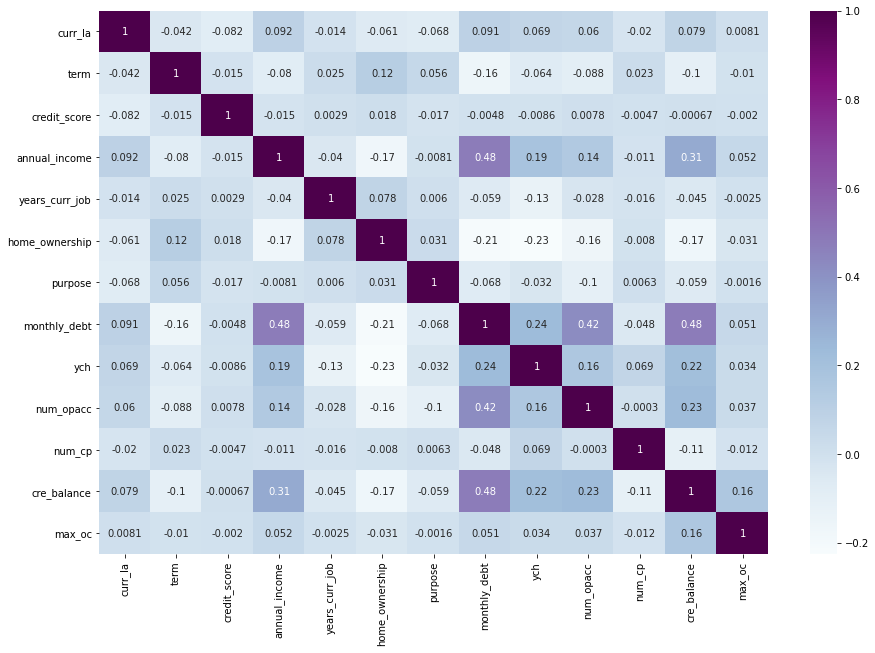

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_loan_null, annot= True, cmap="BuPu")

## MinMaxScaler
m = (x -xmin) / (xmax -xmin)

Where:

* m is our new value
* x is the original cell value
* xmin is the minimum value of the column
* xmax is the maximum value of the column

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaling = MinMaxScaler(feature_range=(0, 1))
#new_x_train =scaling.fit_transform(x_train)
#new_x_test = scaling.fit_transform(x_test)
#new_x= scaling .fit_transform(x)

In [ ]:
#new_x

In [ ]:
#X1=new_x
#Y1=y1
#X1, Y1 = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

#**Add noisy features to make the problem more difficult**
#random_state = np.random.RandomState(0)
#n_samples, n_features = X1.shape
#X1 = np.c_[X1, random_state.randn(n_samples, 200 * n_features)]

#**Data splitting**
from sklearn.model_selection import train_test_split

In [ ]:
## Split our featurs and target into 2 part
   #1) training data 
   #2) Testing data

#X1train,X1test,Y1train,Y1test=model_selection.train_test_split(X1,Y1,test_size=.2,random_state=0)
x1train,x1test,y1train,y1test=model_selection.train_test_split(x1,y1,test_size=.2,random_state=0)

In [ ]:
print(x1train.shape)
print(y1train.shape)

(61816, 13)
(61816,)


In [ ]:
x1train.head()

,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc
9662,1.000000,1.0,0.094724,0.011511,0.1,0.333333,0.2,0.046599,0.513370,0.625310,0.066667,0.009361,0.000349
22505,0.391969,0.0,0.030277,0.010837,0.1,0.333333,0.2,0.044333,0.558677,0.413731,0.000000,0.003771,0.000158
40132,0.249647,1.0,0.094724,0.007025,0.6,0.333333,0.0,0.003317,0.407585,0.371632,0.066667,0.000295,0.000070
24033,0.324813,1.0,0.078621,0.003840,0.1,0.666667,0.2,0.030496,0.720130,0.531685,0.066667,0.004717,0.000349
8723,0.380537,1.0,0.017678,0.010439,0.4,0.666667,0.2,0.110383,0.421104,0.792934,0.000000,0.017110,0.000869


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
table=x1train[ ["term","years_curr_job","home_ownership","purpose"] ]
select_feature = SelectKBest(chi2, k=4).fit(table,y1train)

selected_features_df = pd.DataFrame({'Feature':list(table.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
0,term,189.714558
2,home_ownership,24.643464
1,years_curr_job,2.743571
3,purpose,0.166381


In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
#for continuous
c_table=x1train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]]
select = SelectKBest(f_classif,k=4)
select.fit(c_table,y1train)
mask = select.get_support()
count=c_table.columns
for i in range(len(count)):
    print(f"{count[i]}:   {mask[i]}")

credit_score:   True
monthly_debt:   True
ych:   True
num_opacc:   True
num_cp:   False
cre_balance:   False
max_oc:   False


## **Scaling**

In [ ]:
scaler1=preprocessing.StandardScaler()

In [ ]:
scaler1.fit(x1train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
arr1=scaler1.transform(x1train)

In [ ]:
arr1.shape

(61816, 13)

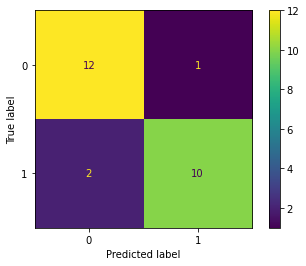

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X=x1
y=y1
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

## **Create a base model**

In [ ]:
def modelstats1(x1train,x1test,y1train,y1test):
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB","RF"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier(n_estimators=1000,random_state=42))
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="recall")
            grid_fit =grid_obj.fit(x1train,y1train)
            model = grid_fit.best_estimator_
            model.fit(x1train,y1train)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(x1train,y1train)
        trainprediction=model.predict(x1train)
        testprediction=model.predict(x1test)
        trainprediction1=model.predict_proba(x1train)
        testprediction1=model.predict_proba(x1test)
        trainprediction1 = trainprediction1[:, 1]
        testprediction1 = testprediction1[:, 1]
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(y1train,trainprediction))
        scores.append(metrics.precision_score(y1train,trainprediction))
        scores.append(metrics.recall_score(y1train,trainprediction))
        scores.append(metrics.f1_score(y1train,trainprediction))
        scores.append(metrics.roc_auc_score(y1train,trainprediction1))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(y1test,testprediction))
        scores.append(metrics.precision_score(y1test,testprediction))
        scores.append(metrics.recall_score(y1test,testprediction))
        scores.append(metrics.f1_score(y1test,testprediction))
        scores.append(metrics.roc_auc_score(y1test,testprediction1))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","f1-score","AUC"]
    return pd.DataFrame(stats,columns=colnames)



In [ ]:
modelstats1(x1train,x1test,y1train,y1test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'n_neighbors': 15}


,MODELNAME,ACCURACY,PRECISION,RECALL,f1-score,AUC
0,LR-train,0.845752,0.836730,0.999959,0.911091,0.727167
1,LR-test,0.845552,0.836361,1.000000,0.910890,0.735086
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.791459,0.859109,0.880164,0.869509,0.669575
4,KNN(15)-train,0.847289,0.840347,0.996009,0.911581,0.823015
5,KNN(15)-test,0.842446,0.837213,0.993607,0.908730,0.729215
6,NB-train,0.829187,0.844023,0.961582,0.898975,0.744656
7,NB-test,0.827758,0.843044,0.960656,0.898015,0.745667
8,RF-train,1.000000,1.000000,1.000000,1.000000,1.000000
9,RF-test,0.846005,0.837689,0.998361,0.910995,0.850100


In [ ]:
#SlectFromModel

model=tree.DecisionTreeClassifier()
frommodel=feature_selection.SelectFromModel(estimator=model,max_features=8)
frommodel.fit(x1train,y1train)

SelectFromModel(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort='deprecated',
                                                 random_state=None,
                                                 splitter='best'),
                max_feat

In [ ]:
x1train1_arr=frommodel.transform(x1train)

In [ ]:
x1train1=pd.DataFrame(x1train1_arr)

In [ ]:
x1train1.columns=x1train.columns.values[frommodel.get_support()]

In [ ]:
x1train1[:5]

,curr_la,credit_score,annual_income,monthly_debt,ych,cre_balance,max_oc
0,1.000000,0.094724,0.011511,0.046599,0.513370,0.009361,0.000349
1,0.391969,0.030277,0.010837,0.044333,0.558677,0.003771,0.000158
2,0.249647,0.094724,0.007025,0.003317,0.407585,0.000295,0.000070
3,0.324813,0.078621,0.003840,0.030496,0.720130,0.004717,0.000349
4,0.380537,0.017678,0.010439,0.110383,0.421104,0.017110,0.000869


In [ ]:
x1test1_arr=frommodel.transform(x1test)

In [ ]:
x1test1=pd.DataFrame(x1test1_arr)

In [ ]:
x1test1.columns=x1test.columns.values[frommodel.get_support()]

In [ ]:
x1test1[:5]

,curr_la,credit_score,annual_income,monthly_debt,ych,cre_balance,max_oc
0,0.443752,0.066377,0.013948,0.114446,0.666727,0.042379,0.001127
1,0.275683,0.088362,0.010759,0.011363,0.619948,0.003680,0.000108
2,0.317772,0.092615,0.005369,0.019376,0.363458,0.008679,0.000370
3,1.000000,0.097345,0.005302,0.029111,0.468064,0.003853,0.000268
4,0.394361,0.966810,0.004665,0.042676,0.474918,0.009748,0.000886


In [ ]:
x1train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61816 entries, 9662 to 88410
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   curr_la         61816 non-null  float64
 1   term            61816 non-null  float64
 2   credit_score    61816 non-null  float64
 3   annual_income   61816 non-null  float64
 4   years_curr_job  61816 non-null  float64
 5   home_ownership  61816 non-null  float64
 6   purpose         61816 non-null  float64
 7   monthly_debt    61816 non-null  float64
 8   ych             61816 non-null  float64
 9   num_opacc       61816 non-null  float64
 10  num_cp          61816 non-null  float64
 11  cre_balance     61816 non-null  float64
 12  max_oc          61816 non-null  float64
dtypes: float64(13)
memory usage: 6.6 MB


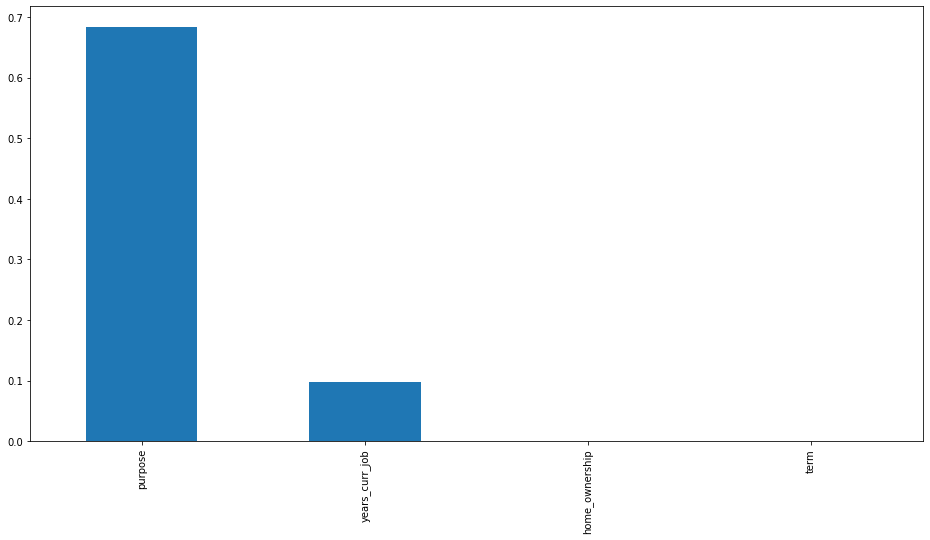

In [ ]:
fval,pv=feature_selection.chi2(x1train[ ["term","years_curr_job","home_ownership","purpose"] ],y1train)
pvser=pd.Series(pv)
pvser.index=x1train[["term","years_curr_job","home_ownership","purpose"]].columns
plt.figure(figsize=(16,8))
pvser.sort_values(ascending=False).plot.bar()


In [ ]:
fval

array([1.89714558e+02, 2.74357138e+00, 2.46434643e+01, 1.66381106e-01])

In [ ]:
np.round(pv,4)

array([0.    , 0.0976, 0.    , 0.6833])

In [ ]:
#SelectKBest

selobj=feature_selection.SelectKBest(feature_selection.chi2,k=4)
selobj.fit(x1train[["term","years_curr_job","home_ownership","purpose"]],y1train)
x1train1_arr=selobj.transform(x1train[["term","years_curr_job","home_ownership","purpose"]])
x1train1=pd.DataFrame(x1train1_arr)
x1train1.columns=x1train[["term","years_curr_job","home_ownership","purpose"]].columns[selobj.get_support()]
x1train1.index=x1train.index

x1test1_arr=selobj.transform(x1test[["term","years_curr_job","home_ownership","purpose"]])
x1test1=pd.DataFrame(x1test1_arr)
x1test1.columns=x1train[["term","years_curr_job","home_ownership","purpose"]].columns[selobj.get_support()]
x1test1.index=x1test.index

In [ ]:
x1train1[:5]


,term,years_curr_job,home_ownership,purpose
9662,1.0,0.1,0.333333,0.2
22505,0.0,0.1,0.333333,0.2
40132,1.0,0.6,0.333333,0.0
24033,1.0,0.1,0.666667,0.2
8723,1.0,0.4,0.666667,0.2


In [ ]:
x1train1.shape

(61816, 4)

In [ ]:
x1test1[:5]

,term,years_curr_job,home_ownership,purpose
31103,1.0,0.5,0.333333,0.2
53027,1.0,0.7,0.333333,0.2
1092,1.0,0.2,0.333333,0.2
56951,1.0,0.4,1.000000,0.2
89385,0.0,0.1,0.333333,0.2


In [ ]:
x1test1.shape

(15455, 4)

In [ ]:
x1train.dtypes

curr_la           float64
term              float64
credit_score      float64
annual_income     float64
years_curr_job    float64
home_ownership    float64
purpose           float64
monthly_debt      float64
ych               float64
num_opacc         float64
num_cp            float64
cre_balance       float64
max_oc            float64
dtype: object

In [ ]:
selobj=feature_selection.SelectKBest(feature_selection.mutual_info_classif ,k=4)
selobj.fit(x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]],y1train)
x1train1_arr=selobj.transform(x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x1train1=pd.DataFrame(x1train1_arr)
x1train1.columns=x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x1train1.index=x1train.index

x1test1_arr=selobj.transform(x1test[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x1test1=pd.DataFrame(x1test1_arr)
x1test1.columns=x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x1test1.index=x1test.index

In [ ]:
x1train1[:5]

,curr_la,credit_score,cre_balance,max_oc
9662,1.000000,0.094724,0.009361,0.000349
22505,0.391969,0.030277,0.003771,0.000158
40132,0.249647,0.094724,0.000295,0.000070
24033,0.324813,0.078621,0.004717,0.000349
8723,0.380537,0.017678,0.017110,0.000869


In [ ]:
x1test1[:5]

,curr_la,credit_score,cre_balance,max_oc
31103,0.443752,0.066377,0.042379,0.001127
53027,0.275683,0.088362,0.003680,0.000108
1092,0.317772,0.092615,0.008679,0.000370
56951,1.000000,0.097345,0.003853,0.000268
89385,0.394361,0.966810,0.009748,0.000886


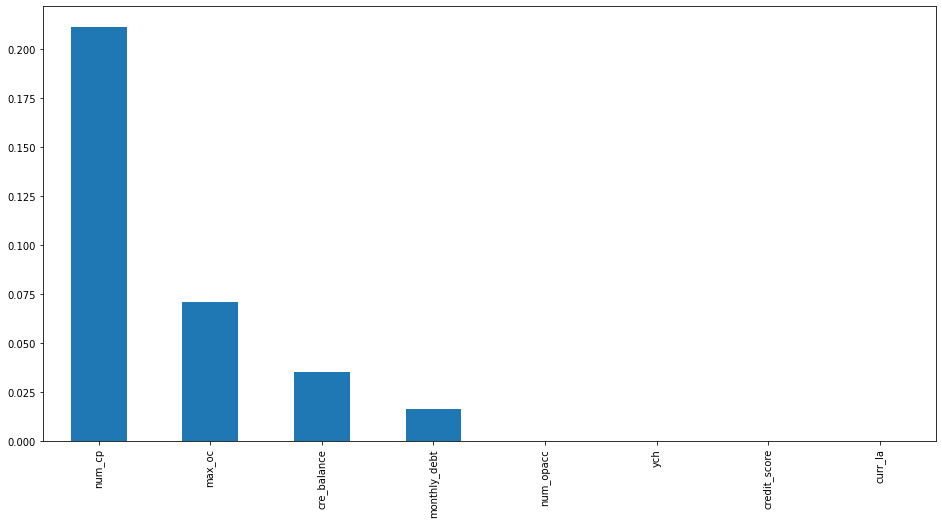

In [ ]:
fval2,pv2=feature_selection.f_classif(x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]],y1train)
pvser2=pd.Series(pv2)
pvser2.index=x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns
plt.figure(figsize=(16,8))
pvser2.sort_values(ascending=False).plot.bar()


In [ ]:
selobj=feature_selection.SelectKBest(feature_selection.f_classif,k=4)
selobj.fit(x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]],y1train)

x1train1_arr=selobj.transform(x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x1train1=pd.DataFrame(x1train1_arr)
x1train1.columns=x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x1train1.index=x1train.index

x1test1_arr=selobj.transform(x1test[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x1test1=pd.DataFrame(x1test1_arr)
x1test1.columns=x1train[["curr_la","credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x1test1.index=x1test.index

In [ ]:
x1train1[:5]

,curr_la,credit_score,ych,num_opacc
9662,1.000000,0.094724,0.513370,0.625310
22505,0.391969,0.030277,0.558677,0.413731
40132,0.249647,0.094724,0.407585,0.371632
24033,0.324813,0.078621,0.720130,0.531685
8723,0.380537,0.017678,0.421104,0.792934


In [ ]:
x1test1.head()

,curr_la,credit_score,ych,num_opacc
31103,0.443752,0.066377,0.666727,0.531685
53027,0.275683,0.088362,0.619948,0.553693
1092,0.317772,0.092615,0.363458,0.531685
56951,1.000000,0.097345,0.468064,0.609379
89385,0.394361,0.966810,0.474918,0.713746


In [ ]:
combi=x1train[["term","purpose","years_curr_job","home_ownership","credit_score","curr_la",	"ych",	"num_opacc"]]
#print(combi)
from itertools import combinations
comb = combinations(combi,6)
res=[]
#li=[]
for i in list(comb): 
    col=list(i) 
    print("used features are:")
    print(col)
    print("==============")
    X1=x1train[col]
    Y1=y1train
    X1train,X1test,Y1train,Y1test=model_selection.train_test_split(X1,Y1,test_size=.2,random_state=0)
    pq=modelstats1(X1train,X1test,Y1train,Y1test)
    print(pq)

used features are:
['term', 'purpose', 'years_curr_job', 'home_ownership', 'credit_score', 'curr_la']
{'n_neighbors': 15}
            MODELNAME  ACCURACY  PRECISION    RECALL  f1-score       AUC
0            LR-train  0.845042   0.835999  0.999898  0.910632  0.721838
1             LR-test  0.848350   0.839610  0.999898  0.912770  0.728016
2  DecisionTree-train  0.999939   1.000000  0.999923  0.999962  1.000000
3   DecisionTree-test  0.778632   0.858213  0.863724  0.860960  0.657698
4       KNN(15)-train  0.846134   0.839764  0.994980  0.910807  0.827052
5        KNN(15)-test  0.844953   0.840611  0.992865  0.910416  0.725953
6            NB-train  0.837115   0.841003  0.978743  0.904660  0.736267
7             NB-test  0.840100   0.843657  0.980124  0.906785  0.735651
8            RF-train  0.999939   0.999923  1.000000  0.999962  1.000000
9             RF-test  0.824895   0.848559  0.948629  0.895808  0.776964

used features are:
['term', 'purpose', 'years_curr_job', 'home_ownership',

In [ ]:
Best_features=['term', 'years_curr_job', 'credit_score', 'curr_la', 'ych', 'num_opacc']
Max_auc_value=0.803930
max_precision_value=0.842738  
highest_model="Random Forest"
print(f"The best features are: {Best_features}")
print(f"Highest auc value is: {Max_auc_value}")
print(f"Highest precision value is: {max_precision_value}")
print(f"Best model is: {highest_model}")

The best features are: ['term', 'years_curr_job', 'credit_score', 'curr_la', 'ych', 'num_opacc']
Highest auc value is: 0.80393
Highest precision value is: 0.842738
Best model is: Random Forest


In [ ]:
#X1=loan_null[["term","years_curr_job","home_ownership","curr_la","credit_score","ych","num_opacc"]]
#Y1=loan_null["ls"]
#X1train,X1test,Y1train,Y1test=model_selection.train_test_split(X1,Y1,test_size=.2,random_state=0)

In [ ]:
model=ensemble.RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(X1train, Y1train)
feature_results = pd.DataFrame({'feature': list(Best_features), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results

NameError: ignored

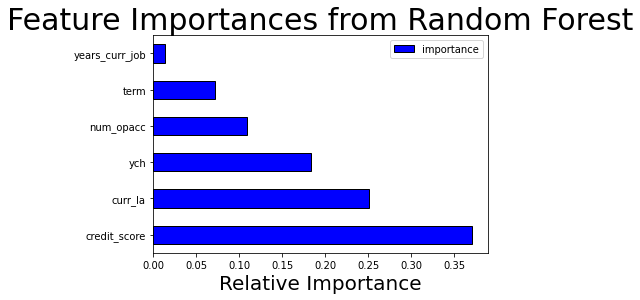

In [ ]:
figsize=(12, 10)

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', edgecolor = 'k',kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

## **ROC Curve**

In [ ]:
# **Generate synthetic dataset**
from sklearn.datasets import make_classification
import numpy as np
X=x1train[Best_features]
Y=y1train

#**Data splitting**
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

#**Build classification model**
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#**Random Forest**
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

#**Naive Bayes**
nb = naive_bayes.GaussianNB()
nb.fit(X_train, Y_train)

#**Linear Rigression**
lr=linear_model.LogisticRegression()
lr.fit(X_train, Y_train)

#**Decision Tree**
dt=tree.DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, Y_train)

#**KNN neighbours**
kn=neighbors.KNeighborsClassifier()
kn.fit(X_train, Y_train)

#**Prediction probabilities**
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)
kn_probs = kn.predict_proba(X_test)

#Probabilities for the positive outcome is kept.
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]
dt_probs = dt_probs[:, 1]
kn_probs = kn_probs[:, 1]

#**Computing AUROC and ROC curve values**
from sklearn.metrics import roc_curve, roc_auc_score

#**Calculate AUROC**
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
dt_auc = roc_auc_score(Y_test, dt_probs)
kn_auc = roc_auc_score(Y_test, kn_probs)

#r_auc = roc_auc_score(Y_test, r_probs)
#rf_auc = 0.636848
#nb_auc = 0.641171
#lr_auc = 0.632981
#dt_auc = 0.670069
#kn_auc = 0.633550

In [ ]:
#**Print AUROC scores**
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('KNN neighbors: AUROC = %.3f' % (kn_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.801
Naive Bayes: AUROC = 0.734
Logistic Regression: AUROC = 0.722
Decision Tree: AUROC = 0.761
KNN neighbors: AUROC = 0.697


In [ ]:
#**Calculate ROC curve**
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_probs)
kn_fpr, kn_tpr, _ = roc_curve(Y_test, kn_probs)

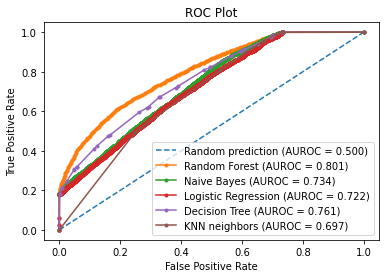

In [ ]:
#**Plot the ROC curve**
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='KNN neighbors (AUROC = %0.3f)' % kn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


# **Handling missing values with zero**

In [ ]:
loan_notnull=df_loan.copy()

In [ ]:
null_values1=df_loan.isna().sum()/len(df_loan)
print(null_values1)

ls                0.005114
curr_la           0.005114
term              0.005114
credit_score      0.195674
annual_income     0.195674
years_curr_job    0.047118
home_ownership    0.005114
purpose           0.005114
monthly_debt      0.005114
ych               0.005114
num_opacc         0.005114
num_cp            0.005114
cre_balance       0.005114
max_oc            0.005134
bankruptcies      0.007143
tx_liens          0.005213
dtype: float64


In [ ]:
loan_notnull.head()

,ls,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc,bankruptcies,tx_liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
#mean0=loan_notnull[loan_notnull.ls=="0"]["term"].mean()
#mean1=loan_notnull[loan_notnull.ls=="1"]["term"].mean()
#loan_notnull[loan_notnull.ls=="0"]["term"].fillna(mean0,inplace=True)
#loan_notnull[loan_notnull.ls=="1"]["term"].fillna(mean1,inplace=True)

In [ ]:
#loan_notnull.fillna(0,inplace=True)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#cols1=["ls","term","years_curr_job","home_ownership","purpose"]
#le=LabelEncoder()
#for col in cols1:
  #loan_notnull[col]=le.fit_transform(loan_notnull[col])

In [ ]:
#null_values4=loan_notnull.isna().sum()/len(loan_notnull)
#print(null_values4)

In [ ]:
#loan_notnull.describe()

# **Variable Encoding**

In [ ]:
loan_notnull["ls"].value_counts()

Fully Paid     77361
Charged Off    22639
Name: ls, dtype: int64

In [ ]:
#Numerical Encoding
loan_notnull["ls"]=loan_notnull["ls"].map({'Fully Paid':int('0'),'Charged Off':int('1')})

In [ ]:
loan_notnull["ls"].value_counts()

0.0    77361
1.0    22639
Name: ls, dtype: int64

In [ ]:
loan_notnull["term"].value_counts()

Short Term    72208
Long Term     27792
Name: term, dtype: int64

In [ ]:
#Mean Encoding
#Mean_encoded_subject = loan_notnull.groupby(['term'])['ls'].mean().to_dict() 
#loan_notnull['term'] =loan_notnull['term'].map(Mean_encoded_subject) 

#Numerical Encoding
loan_notnull["term"]=loan_notnull["term"].map({'Short Term':int('0'),'Long Term':int('1')})


In [ ]:
 loan_notnull["term"].value_counts()

0.0    72208
1.0    27792
Name: term, dtype: int64

In [ ]:
loan_notnull["years_curr_job"].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: years_curr_job, dtype: int64

In [ ]:
#Mean Encoding
#Mean_encoded_subject = loan_notnull.groupby(['years_curr_job'])['ls'].mean().to_dict() 
#loan_notnull['years_curr_job'] = loan_notnull['years_curr_job'].map(Mean_encoded_subject) 

#Numerical Rncoding
loan_notnull["years_curr_job"]=loan_notnull["years_curr_job"].map({'10+ years':int('0'),'2 years':int('1'),'3 years':int('2'),'< 1 year':int('3'),'5 years':int('4'),'1 year':int('5'),'4 years':int('6'),'6 years':int('7'),'7 years':int('8'),'8 years':int('9'),'9 years':int('10')})



In [ ]:
loan_notnull["years_curr_job"].value_counts()

0.0     31121
1.0      9134
2.0      8169
3.0      8164
4.0      6787
5.0      6460
6.0      6143
7.0      5686
8.0      5577
9.0      4582
10.0     3955
Name: years_curr_job, dtype: int64

In [ ]:
loan_notnull["home_ownership"].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: home_ownership, dtype: int64

In [ ]:
##Numerical encoding
loan_notnull["home_ownership"]=loan_notnull["home_ownership"].map({'Home Mortgage':int('0'),'Rent':int('1'),'Own Home':int('2'),'HaveMortgage':int('0')})


## Mean Encoding
#Mean_encoded_subject = loan_notnull.groupby(['home_ownership'])['ls'].mean().to_dict() 
#loan_notnull['home_ownership'] = loan_notnull['home_ownership'].map(Mean_encoded_subject) 

In [ ]:
loan_notnull["home_ownership"].value_counts()

0.0    48624
1.0    42194
2.0     9182
Name: home_ownership, dtype: int64

In [ ]:
loan_notnull["purpose"].value_counts() 

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: purpose, dtype: int64

In [ ]:
#Numerical Encoding
loan_notnull["purpose"]=loan_notnull["purpose"].map({'Debt Consolidation':int('0'),'other':int('1'),'Home Improvements':int('2'),'Other':int('1'),'Business Loan':int('3'),'Buy a Car':int('4'),'Medical Bills':int('5'),'Buy House':int('6'),'Take a Trip':int('7'),'major_purchase':int('8'),'small_business':int('9'),'moving':int('10'),'wedding':int('11'),'vacation':int('12'),'Educational Expenses':int('13'),'renewable_energy':int('14')})


#Mean Encoding
#Mean_encoded_subject = loan_notnull.groupby(['purpose'])['ls'].mean().to_dict() 
#loan_notnull['purpose'] = loan_notnull['purpose'].map(Mean_encoded_subject) 


In [ ]:
loan_notnull["purpose"].value_counts() 

0.0     78552
1.0      9287
2.0      5839
3.0      1569
4.0      1265
5.0      1127
6.0       678
7.0       573
8.0       352
9.0       283
10.0      150
11.0      115
12.0      101
13.0       99
14.0       10
Name: purpose, dtype: int64

In [ ]:
null_values3=loan_notnull.isna().sum()/len(loan_notnull)
print(null_values3)

ls                0.005114
curr_la           0.005114
term              0.005114
credit_score      0.195674
annual_income     0.195674
years_curr_job    0.047118
home_ownership    0.005114
purpose           0.005114
monthly_debt      0.005114
ych               0.005114
num_opacc         0.005114
num_cp            0.005114
cre_balance       0.005114
max_oc            0.005134
bankruptcies      0.007143
tx_liens          0.005213
dtype: float64


In [ ]:
loan_notnull.fillna(0,inplace=True)

In [ ]:
null_values4=loan_notnull.isna().sum()/len(loan_notnull)
print(null_values4)

ls                0.0
curr_la           0.0
term              0.0
credit_score      0.0
annual_income     0.0
years_curr_job    0.0
home_ownership    0.0
purpose           0.0
monthly_debt      0.0
ych               0.0
num_opacc         0.0
num_cp            0.0
cre_balance       0.0
max_oc            0.0
bankruptcies      0.0
tx_liens          0.0
dtype: float64


# **Inputing Missing Values**

In [ ]:
#Imputing Missing values with mean for continuous variable
#loan_notnull['curr_la'].fillna(loan_notnull['curr_la'].mean(), inplace=True)
#loan_notnull['credit_score'].fillna(loan_notnull['credit_score'].mean(), inplace=True)
#loan_notnull['annual_income'].fillna(loan_notnull['annual_income'].mean(), inplace=True)
#loan_notnull['monthly_debt'].fillna(loan_notnull['monthly_debt'].mean(), inplace=True)
#loan_notnull['ych'].fillna(loan_notnull['ych'].mean(), inplace=True)
#loan_notnull['num_opacc'].fillna(loan_notnull['num_opacc'].mean(), inplace=True)
#loan_notnull['num_cp'].fillna(loan_notnull['num_cp'].mean(), inplace=True)
#loan_notnull['cre_balance'].fillna(loan_notnull['cre_balance'].mean(), inplace=True)
#loan_notnull['max_oc'].fillna(loan_notnull['max_oc'].mean(), inplace=True)
#loan_notnull['bankruptcies'].fillna(loan_notnull['bankruptcies'].mean(), inplace=True)
#loan_notnull['tx_liens'].fillna(loan_notnull['tx_liens'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
#loan_notnull['term'].fillna(loan_notnull['term'].mode()[0], inplace=True)
#loan_notnull['years_curr_job'].fillna(loan_notnull['years_curr_job'].mode()[0], inplace=True)
#loan_notnull['home_ownership'].fillna(loan_notnull['home_ownership'].mode()[0], inplace=True)
#loan_notnull['purpose'].fillna(loan_notnull['purpose'].mode()[0], inplace=True)
#loan_notnull['purpose'].fillna(loan_notnull['purpose'].mode()[0], inplace=True)

In [ ]:
loan_notnull.dtypes

ls                float64
curr_la           float64
term              float64
credit_score      float64
annual_income     float64
years_curr_job    float64
home_ownership    float64
purpose           float64
monthly_debt      float64
ych               float64
num_opacc         float64
num_cp            float64
cre_balance       float64
max_oc            float64
bankruptcies      float64
tx_liens          float64
dtype: object

# **Label Encoding**

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#cols1=["ls","term","years_curr_job","home_ownership","purpose"]
#le=LabelEncoder()
#for col in cols1:
  #loan_notnull[col]=le.fit_transform(loan_notnull[col])

## **Outlier Detection**

In [ ]:
from scipy import stats
import numpy as np
z1 = np.abs(stats.zscore(loan_notnull))
print(z1)

[[5.39174805e-01 3.54892797e-01 6.18197143e-01 ... 4.06723789e-02
  2.52094839e+00 1.13236162e-01]
 [5.39174805e-01 3.60665858e-01 6.18197143e-01 ... 1.12268636e-02
  3.33706723e-01 1.13236162e-01]
 [5.39174805e-01 2.78429272e+00 6.18197143e-01 ... 8.13423947e-04
  3.33706723e-01 1.13236162e-01]
 ...
 [5.39174805e-01 3.68937664e-01 6.18197143e-01 ... 9.05039644e-02
  3.33706723e-01 1.13236162e-01]
 [5.39174805e-01 3.68937664e-01 6.18197143e-01 ... 9.05039644e-02
  3.33706723e-01 1.13236162e-01]
 [5.39174805e-01 3.68937664e-01 6.18197143e-01 ... 9.05039644e-02
  3.33706723e-01 1.13236162e-01]]


In [ ]:
upper_limit=loan_notnull.mean()+3*loan_notnull.std()
upper_limit

ls                1.478444e+00
curr_la           1.068413e+08
term              1.618305e+00
credit_score      5.037050e+03
annual_income     4.448580e+06
years_curr_job    1.276504e+01
home_ownership    2.551796e+00
purpose           5.037171e+00
monthly_debt      5.502323e+04
ych               3.945633e+01
num_opacc         2.625071e+01
num_cp            1.612306e+00
cre_balance       1.420519e+06
max_oc            2.584629e+07
bankruptcies      1.167819e+00
tx_liens          8.017118e-01
dtype: float64

In [ ]:
lower_limit=loan_notnull.mean()-3*loan_notnull.std()
lower_limit

ls               -1.027980e+00
curr_la          -8.344069e+07
term             -1.065307e+00
credit_score     -3.305408e+03
annual_income    -2.231413e+06
years_curr_job   -6.567373e+00
home_ownership   -1.346830e+00
purpose          -3.938558e+00
monthly_debt     -1.826733e+04
ych              -3.244180e+00
num_opacc        -4.107466e+00
num_cp           -1.277407e+00
cre_balance      -8.342572e+05
max_oc           -2.433250e+07
bankruptcies     -9.340211e-01
tx_liens         -7.433916e-01
dtype: float64

In [ ]:
loan_notnull[(loan_notnull>upper_limit)|(loan_notnull<lower_limit)]

,ls,curr_la,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc,bankruptcies,tx_liens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_notnull_no_outlier_std_dev=loan_notnull[(loan_notnull<upper_limit)&(loan_notnull>lower_limit)]
loan_notnull_no_outlier_std_dev.shape

(100514, 16)

In [ ]:
loan_notnull.shape

(100514, 16)

In [ ]:
null_values1=loan_notnull.isna().sum()/len(loan_notnull)
print(null_values1)

ls                0.0
curr_la           0.0
term              0.0
credit_score      0.0
annual_income     0.0
years_curr_job    0.0
home_ownership    0.0
purpose           0.0
monthly_debt      0.0
ych               0.0
num_opacc         0.0
num_cp            0.0
cre_balance       0.0
max_oc            0.0
bankruptcies      0.0
tx_liens          0.0
dtype: float64


## **Find X and Y**

In [ ]:
# Find x2(features) and y2(target)

x2=loan_notnull.drop(["ls","tx_liens","bankruptcies","curr_la"],axis=1)
y2=loan_notnull["ls"]

In [ ]:
x2.head()

,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc
0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0
1,0.0,0.0,0.0,0.0,0.0,0.0,33295.98,21.1,35.0,0.0,229976.0,850784.0
2,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0
3,1.0,721.0,806949.0,2.0,2.0,0.0,8741.90,12.0,9.0,0.0,256329.0,386958.0
4,0.0,0.0,0.0,4.0,1.0,0.0,20639.70,6.1,15.0,0.0,253460.0,427174.0


In [ ]:
x2=x2.apply(lambda x: (x - x.min(axis=0) ) / (x.max(axis=0) - x.min(axis=0)))

In [ ]:
x2.head()

,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc
0,0.0,0.094407,0.007052,0.9,0.0,0.142857,0.011965,0.243972,0.078947,0.066667,0.006940,0.000271
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.076394,0.299291,0.460526,0.000000,0.006995,0.000553
2,0.0,0.098668,0.013481,0.9,1.0,0.000000,0.066998,0.211348,0.236842,0.066667,0.009063,0.000487
3,1.0,0.096005,0.004874,0.2,1.0,0.000000,0.020057,0.170213,0.118421,0.000000,0.007796,0.000251
4,0.0,0.000000,0.000000,0.4,0.5,0.000000,0.047356,0.086525,0.197368,0.000000,0.007709,0.000277


In [ ]:
## Split our featurs and target into 2 part
   #1) training data 
   #2) Testing data


x2train,x2test,y2train,y2test=model_selection.train_test_split(x2,y2,test_size=.2,random_state=0)

In [ ]:
print(x2train.shape)
print(y2train.shape)

(80411, 12)
(80411,)


## **Correlation Matrix**

In [ ]:
corr_loan_notnull=x2.corr()

In [ ]:
corr_loan_notnull

,term,credit_score,annual_income,years_curr_job,home_ownership,purpose,monthly_debt,ych,num_opacc,num_cp,cre_balance,max_oc
term,1.000000,0.042804,0.088712,-0.009760,-0.089425,-0.038502,0.162341,0.048853,0.088455,-0.025021,0.106931,0.008629
credit_score,0.042804,1.000000,0.136689,0.004278,0.018539,-0.000766,0.005331,-0.001366,0.014285,0.000768,0.003107,-0.003608
annual_income,0.088712,0.136689,1.000000,-0.013001,-0.113754,0.020731,0.390470,0.135213,0.127617,-0.008051,0.252937,0.031565
years_curr_job,-0.009760,0.004278,-0.013001,1.000000,0.031406,0.009871,-0.021124,-0.134294,0.007024,-0.016813,-0.035104,-0.003888
home_ownership,-0.089425,0.018539,-0.113754,0.031406,1.000000,0.017513,-0.166854,-0.110684,-0.095174,0.005615,-0.116868,-0.014047
purpose,-0.038502,-0.000766,0.020731,0.009871,0.017513,1.000000,-0.070026,-0.006798,-0.072590,0.008915,-0.059020,0.002538
monthly_debt,0.162341,0.005331,0.390470,-0.021124,-0.166854,-0.070026,1.000000,0.214477,0.420811,-0.052354,0.483823,0.039737
ych,0.048853,-0.001366,0.135213,-0.134294,-0.110684,-0.006798,0.214477,1.000000,0.157132,0.065083,0.214852,0.031784
num_opacc,0.088455,0.014285,0.127617,0.007024,-0.095174,-0.072590,0.420811,0.157132,1.000000,-0.009907,0.233731,0.031972
num_cp,-0.025021,0.000768,-0.008051,-0.016813,0.005615,0.008915,-0.052354,0.065083,-0.009907,1.000000,-0.110911,-0.011905


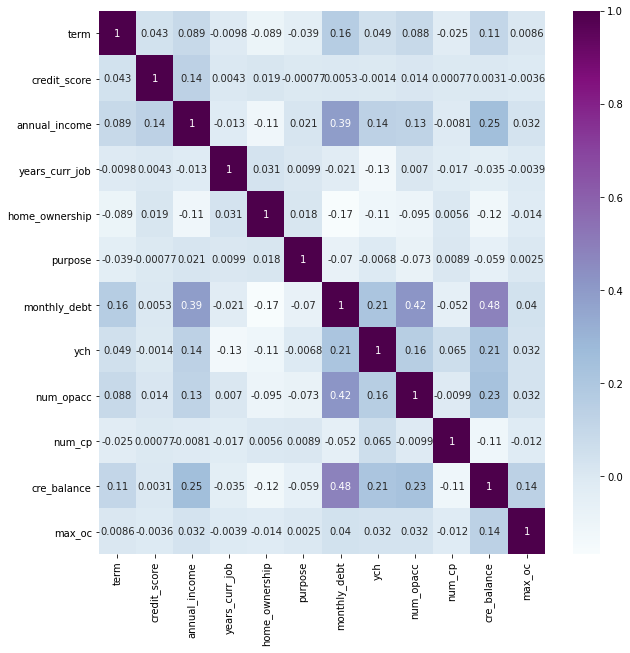

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
plt.figure(figsize=(10,10))
sns.heatmap(corr_loan_notnull, annot= True, cmap="BuPu")

## **Scaling**

In [ ]:
scaler2=preprocessing.StandardScaler()

In [ ]:
scaler2.fit(x2train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
arr2=scaler2.transform(x2train)

In [ ]:
arr2.shape

(80411, 12)

In [ ]:
x2train.head

<bound method NDFrame.head of        term  credit_score  annual_income  ...    num_cp  cre_balance    max_oc
93021   0.0      0.094940       0.005498  ...  0.000000     0.003208  0.000193
11553   0.0      0.093875       0.007943  ...  0.066667     0.004958  0.000370
75672   0.0      0.000000       0.000000  ...  0.000000     0.020523  0.000763
72697   1.0      0.095206       0.005762  ...  0.000000     0.007811  0.000291
69423   0.0      0.095073       0.004490  ...  0.000000     0.005928  0.000243
...     ...           ...            ...  ...       ...          ...       ...
21243   1.0      0.087883       0.008427  ...  0.000000     0.009547  0.000303
45891   0.0      0.099867       0.008638  ...  0.000000     0.003572  0.000391
42613   0.0      0.095606       0.007409  ...  0.000000     0.013050  0.000394
43567   0.0      0.095739       0.003413  ...  0.000000     0.005479  0.000144
68268   0.0      0.096005       0.002958  ...  0.000000     0.004897  0.000139

[80411 rows x 12 colu

# **Confusion matrix**

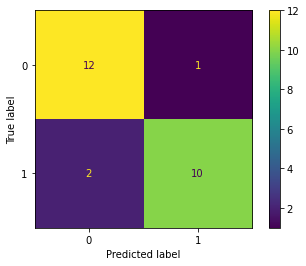

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X=x2
y=y2
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [ ]:
def modelstats2(x2train,x2test,y2train,y2test):
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB","RF"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier(max_features=5, n_estimators=500))
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="recall")
            grid_fit =grid_obj.fit(x2train,y2train)
            model = grid_fit.best_estimator_
            model.fit(x2train,y2train)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(x2train,y2train)
        trainprediction=model.predict(x2train)
        testprediction=model.predict(x2test)
        trainprediction1=model.predict_proba(x2train)
        testprediction1=model.predict_proba(x2test)
        trainprediction1 = trainprediction1[:, 1]
        testprediction1 = testprediction1[:, 1]
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(y2train,trainprediction))
        scores.append(metrics.precision_score(y2train,trainprediction))
        scores.append(metrics.recall_score(y2train,trainprediction))
        scores.append(metrics.roc_auc_score(y2train,trainprediction1))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(y2test,testprediction))
        scores.append(metrics.precision_score(y2test,testprediction))
        scores.append(metrics.recall_score(y2test,testprediction))
        scores.append(metrics.roc_auc_score(y2test,testprediction1))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)



modelstats2(x2train,x2test,y2train,y2test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.819502,1.000000,0.201650,0.642761
1,LR-test,0.822116,1.000000,0.198026,0.649416
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.749490,0.433264,0.420049,0.631720
4,KNN(5)-train,0.838443,0.797228,0.382783,0.865956
5,KNN(5)-test,0.797990,0.593340,0.283696,0.651958
6,NB-train,0.797764,0.602589,0.309846,0.675744
7,NB-test,0.799383,0.591731,0.308141,0.676351
8,RF-train,1.000000,1.000000,1.000000,1.000000
9,RF-test,0.820873,0.847650,0.234582,0.783709


In [ ]:
#SlectFromModel

model=ensemble.RandomForestClassifier(n_estimators=1000,random_state=42)
frommodel=feature_selection.SelectFromModel(estimator=model,max_features=5)
frommodel.fit(x2train,y2train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False

In [ ]:
x2train1_arr=frommodel.transform(x2train)

In [ ]:
x2train1=pd.DataFrame(x2train1_arr)

In [ ]:
x2train1.columns=x2train.columns.values[frommodel.get_support()]

In [ ]:
x2train1[:5]

,credit_score,monthly_debt,ych,cre_balance,max_oc
0,0.094940,0.020188,0.190071,0.003208,0.000193
1,0.093875,0.049782,0.167376,0.004958,0.000370
2,0.000000,0.046674,0.482270,0.020523,0.000763
3,0.095206,0.018240,0.119149,0.007811,0.000291
4,0.095073,0.025728,0.234043,0.005928,0.000243


In [ ]:
x2test1_arr=frommodel.transform(x2test)

In [ ]:
x2test1=pd.DataFrame(x2test1_arr)

In [ ]:
x2test1.columns=x2test.columns.values[frommodel.get_support()]

In [ ]:
x2test1[:5]

,credit_score,monthly_debt,ych,cre_balance,max_oc
0,0.096405,0.021602,0.265248,0.006758,0.000247
1,0.093076,0.009040,0.147518,0.003281,0.000086
2,0.095872,0.036162,0.151773,0.002800,0.000422
3,0.095340,0.044769,0.367376,0.000122,0.000073
4,0.094141,0.037397,0.234043,0.002028,0.000053


In [ ]:
x2train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80411 entries, 93021 to 68268
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   term            80411 non-null  float64
 1   credit_score    80411 non-null  float64
 2   annual_income   80411 non-null  float64
 3   years_curr_job  80411 non-null  float64
 4   home_ownership  80411 non-null  float64
 5   purpose         80411 non-null  float64
 6   monthly_debt    80411 non-null  float64
 7   ych             80411 non-null  float64
 8   num_opacc       80411 non-null  float64
 9   num_cp          80411 non-null  float64
 10  cre_balance     80411 non-null  float64
 11  max_oc          80411 non-null  float64
dtypes: float64(12)
memory usage: 8.0 MB


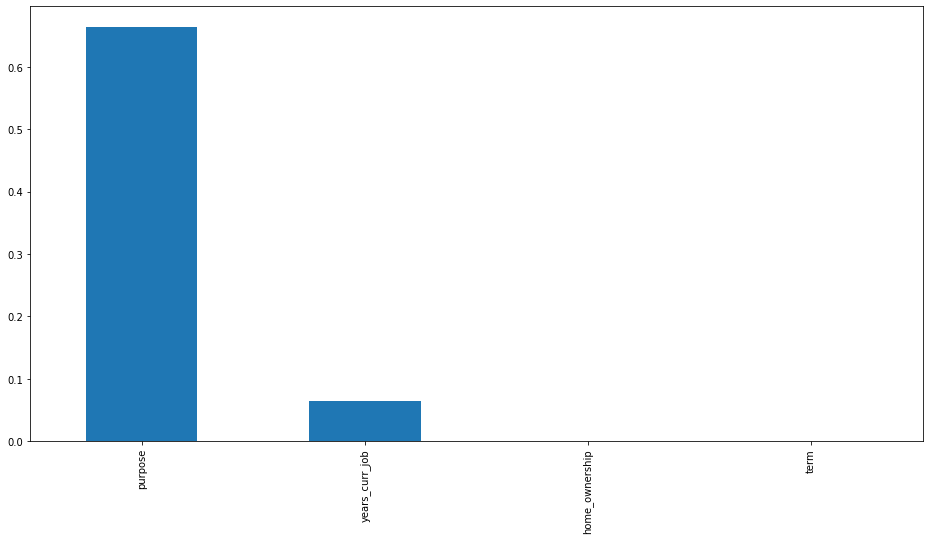

In [ ]:
fval3,pv3=feature_selection.chi2(x2train[ ["term","years_curr_job","home_ownership","purpose"] ],y2train)
pvser3=pd.Series(pv3)
pvser3.index=x2train[["term","years_curr_job","home_ownership","purpose"]].columns
plt.figure(figsize=(16,8))
pvser3.sort_values(ascending=False).plot.bar()


In [ ]:
fval3

array([6.90680124e+02, 3.41050097e+00, 5.71963430e+01, 1.88960849e-01])

In [ ]:
np.round(pv3,4)

array([0.    , 0.0648, 0.    , 0.6638])

In [ ]:
#SelectKBest

selobj=feature_selection.SelectKBest(feature_selection.chi2,k=4)
selobj.fit(x2train[["term","years_curr_job","home_ownership","purpose"]],y2train)
x2train1_arr=selobj.transform(x2train[["term","years_curr_job","home_ownership","purpose"]])
x2train1=pd.DataFrame(x2train1_arr)
x2train1.columns=x2train[["term","years_curr_job","home_ownership","purpose"]].columns[selobj.get_support()]
x2train1.index=x2train.index

x2test1_arr=selobj.transform(x2test[["term","years_curr_job","home_ownership","purpose"]])
x2test1=pd.DataFrame(x2test1_arr)
x2test1.columns=x2train[["term","years_curr_job","home_ownership","purpose"]].columns[selobj.get_support()]
x2test1.index=x2test.index

In [ ]:
x2train1[:5]


,term,years_curr_job,home_ownership,purpose
93021,0.0,0.0,0.0,0.071429
11553,0.0,0.8,0.0,0.000000
75672,0.0,0.8,0.5,0.071429
72697,1.0,0.1,0.5,0.000000
69423,0.0,0.2,0.5,0.071429


In [ ]:
x2train1.shape

(80411, 4)

In [ ]:
x2test1[:5]

,term,years_curr_job,home_ownership,purpose
33516,0.0,0.2,0.0,0.000000
61341,0.0,0.1,0.0,0.000000
87833,1.0,0.2,0.5,0.000000
53553,0.0,0.0,0.0,0.000000
81762,0.0,0.7,0.0,0.142857


In [ ]:
x2test1.shape

(20103, 4)

In [ ]:
x2train.dtypes

term              float64
credit_score      float64
annual_income     float64
years_curr_job    float64
home_ownership    float64
purpose           float64
monthly_debt      float64
ych               float64
num_opacc         float64
num_cp            float64
cre_balance       float64
max_oc            float64
dtype: object

In [ ]:
selobj=feature_selection.SelectKBest(feature_selection.mutual_info_classif ,k=4)
selobj.fit(x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]],y2train)
x2train1_arr=selobj.transform(x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x2train1=pd.DataFrame(x2train1_arr)
x2train1.columns=x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x2train1.index=x2train.index

x2test1_arr=selobj.transform(x2test[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x2test1=pd.DataFrame(x2test1_arr)
x2test1.columns=x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x2test1.index=x2test.index

In [ ]:
x2train1[:5]

,credit_score,monthly_debt,cre_balance,max_oc
93021,0.094940,0.020188,0.003208,0.000193
11553,0.093875,0.049782,0.004958,0.000370
75672,0.000000,0.046674,0.020523,0.000763
72697,0.095206,0.018240,0.007811,0.000291
69423,0.095073,0.025728,0.005928,0.000243


In [ ]:
x2test1[:5]

,credit_score,monthly_debt,cre_balance,max_oc
33516,0.096405,0.021602,0.006758,0.000247
61341,0.093076,0.009040,0.003281,0.000086
87833,0.095872,0.036162,0.002800,0.000422
53553,0.095340,0.044769,0.000122,0.000073
81762,0.094141,0.037397,0.002028,0.000053


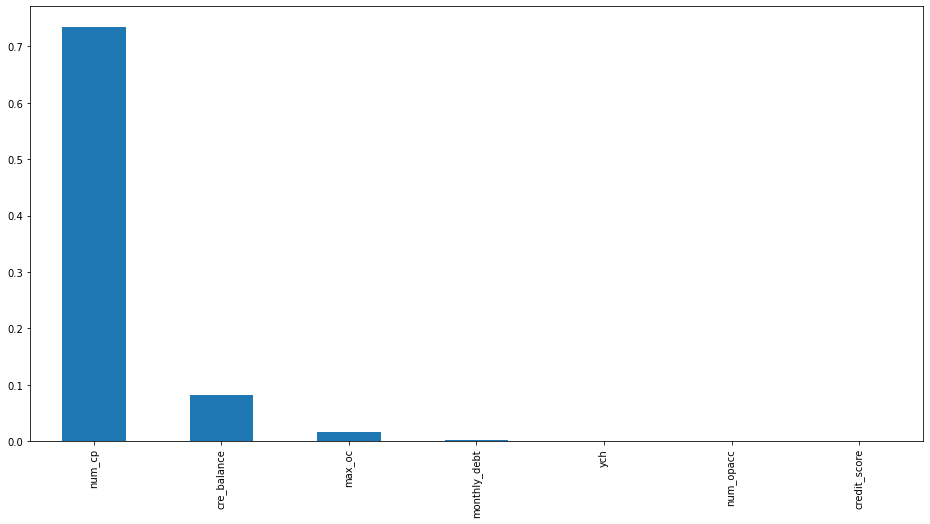

In [ ]:
fval4,pv4=feature_selection.f_classif(x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]],y2train)
pvser4=pd.Series(pv4)
pvser4.index=x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns
plt.figure(figsize=(16,8))
pvser4.sort_values(ascending=False).plot.bar()


In [ ]:
selobj=feature_selection.SelectKBest(feature_selection.f_classif,k=4)
selobj.fit(x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]],y2train)
x2train1_arr=selobj.transform(x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x2train1=pd.DataFrame(x2train1_arr)
x2train1.columns=x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x2train1.index=x2train.index

x2test1_arr=selobj.transform(x2test[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]])
x2test1=pd.DataFrame(x2test1_arr)
x2test1.columns=x2train[["credit_score","monthly_debt","ych","num_opacc","num_cp","cre_balance","max_oc"]].columns[selobj.get_support()]
x2test1.index=x2test.index

In [ ]:
x2train1[:5]

,credit_score,monthly_debt,ych,num_opacc
93021,0.094940,0.020188,0.190071,0.131579
11553,0.093875,0.049782,0.167376,0.184211
75672,0.000000,0.046674,0.482270,0.157895
72697,0.095206,0.018240,0.119149,0.105263
69423,0.095073,0.025728,0.234043,0.131579


In [ ]:
x2test1.head()

,credit_score,monthly_debt,ych,num_opacc
33516,0.096405,0.021602,0.265248,0.118421
61341,0.093076,0.009040,0.147518,0.052632
87833,0.095872,0.036162,0.151773,0.250000
53553,0.095340,0.044769,0.367376,0.118421
81762,0.094141,0.037397,0.234043,0.065789


In [ ]:
combi=loan_notnull[["term",	"years_curr_job",	"home_ownership",	"purpose","credit_score",	"monthly_debt",	"ych",	"num_opacc"]]
#print(combi)
from itertools import combinations
comb = combinations(combi,6)
res=[]
for i in list(comb): 
    col=list(i) 
    print("used features are:")
    print(col)
    print("==============")
    X2=x2train[col]
    Y2=y2train
    X2train,X2test,Y2train,Y2test=model_selection.train_test_split(X2,Y2,test_size=.2,random_state=0)
    pq=modelstats2(X2train,X2test,Y2train,Y2test)
    print(pq)
    #cl = pq.values.tolist()
    #cl.insert(0, col)
    #res.append(cl)
    #print(res)
    print()

used features are:
['term', 'years_curr_job', 'home_ownership', 'purpose', 'credit_score', 'monthly_debt']
{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.819643   1.000000  0.202173  0.620102
1             LR-test  0.819064   1.000000  0.200110  0.614316
2  DecisionTree-train  0.999922   1.000000  0.999656  1.000000
3   DecisionTree-test  0.739539   0.420765  0.402144  0.620132
4        KNN(5)-train  0.838437   0.793631  0.385573  0.864212
5         KNN(5)-test  0.793322   0.589408  0.284497  0.651392
6            NB-train  0.818741   0.966948  0.205199  0.681204
7             NB-test  0.818193   0.969737  0.202584  0.685444
8            RF-train  0.999922   0.999931  0.999725  1.000000
9             RF-test  0.789716   0.565776  0.302639  0.695446

used features are:
['term', 'years_curr_job', 'home_ownership', 'purpose', 'credit_score', 'ych']
{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.773940   0.000000  0.000000  0.583489
1             LR-test  0.773798   0.000000  0.000000  0.583511
2  DecisionTree-train  1.000000   1.000000  1.000000  1.000000
3   DecisionTree-test  0.700616   0.319755  0.286971  0.554253
4        KNN(5)-train  0.804331   0.658969  0.278641  0.812870
5         KNN(5)-test  0.738233   0.313316  0.131941  0.557301
6            NB-train  0.770069   0.321377  0.015404  0.582070
7             NB-test  0.769073   0.276471  0.012919  0.579132
8            RF-train  1.000000   1.000000  1.000000  1.000000
9             RF-test  0.759933   0.403796  0.128642  0.639419

used features are:
['term', 'years_curr_job', 'home_ownership', 'purpose', 'monthly_debt', 'num_opacc']


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.773940   0.000000  0.000000  0.584042
1             LR-test  0.773798   0.000000  0.000000  0.584035
2  DecisionTree-train  0.999922   1.000000  0.999656  1.000000
3   DecisionTree-test  0.700678   0.319299  0.285596  0.553692
4        KNN(5)-train  0.803429   0.656803  0.273209  0.812435
5         KNN(5)-test  0.736305   0.290770  0.115173  0.548714
6            NB-train  0.770162   0.321586  0.015060  0.581621
7             NB-test  0.769384   0.284848  0.012919  0.579987
8            RF-train  0.999922   1.000000  0.999656  1.000000
9             RF-test  0.743953   0.338275  0.137988  0.625986

used features are:
['term', 'years_curr_job', 'home_ownership', 'purpose', 'ych', 'num_opacc']


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.773940   0.000000  0.000000  0.584814
1             LR-test  0.773798   0.000000  0.000000  0.585093
2  DecisionTree-train  0.950208   0.984035  0.792601  0.991466
3   DecisionTree-test  0.708947   0.322074  0.259483  0.554252
4        KNN(5)-train  0.803181   0.657881  0.269495  0.808350
5         KNN(5)-test  0.739601   0.305241  0.118472  0.548967
6            NB-train  0.770224   0.325547  0.015335  0.582535
7             NB-test  0.768949   0.270588  0.012644  0.580374
8            RF-train  0.950208   0.962627  0.811236  0.989701
9             RF-test  0.737735   0.331981  0.157504  0.608370

used features are:
['term', 'years_curr_job', 'home_ownership', 'credit_score', 'monthly_debt', 'ych']
{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.819643   1.000000  0.202173  0.621355
1             LR-test  0.819064   1.000

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.773940   0.000000  0.000000  0.584270
1             LR-test  0.773798   0.000000  0.000000  0.584865
2  DecisionTree-train  1.000000   1.000000  1.000000  1.000000
3   DecisionTree-test  0.698626   0.316763  0.287246  0.553064
4        KNN(5)-train  0.804891   0.664518  0.276509  0.813114
5         KNN(5)-test  0.739290   0.303052  0.117372  0.554225
6            NB-train  0.773940   0.000000  0.000000  0.585622
7             NB-test  0.773798   0.000000  0.000000  0.584754
8            RF-train  1.000000   1.000000  1.000000  1.000000
9             RF-test  0.765218   0.415441  0.093183  0.661221

used features are:
['term', 'years_curr_job', 'purpose', 'credit_score', 'monthly_debt', 'ych']
{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.819643   1.000000  0.202173  0.619505
1             LR-test  0.819064   1.000000  0.200110  0.609858
2 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.773940   0.000000  0.000000  0.571845
1             LR-test  0.773798   0.000000  0.000000  0.563667
2  DecisionTree-train  1.000000   1.000000  1.000000  1.000000
3   DecisionTree-test  0.706336   0.337721  0.310335  0.566216
4        KNN(5)-train  0.801610   0.651309  0.263444  0.807926
5         KNN(5)-test  0.737549   0.295725  0.115998  0.547872
6            NB-train  0.770380   0.325723  0.014716  0.568773
7             NB-test  0.769259   0.267516  0.011545  0.560118
8            RF-train  1.000000   1.000000  1.000000  1.000000
9             RF-test  0.763726   0.387187  0.076416  0.660705

used features are:
['term', 'years_curr_job', 'credit_score', 'monthly_debt', 'ych', 'num_opacc']
{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.819643   1.000000  0.202173  0.619733
1             LR-test  0.819064   1.000000  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.773940   0.000000  0.000000  0.584876
1             LR-test  0.773798   0.000000  0.000000  0.586175
2  DecisionTree-train  1.000000   1.000000  1.000000  1.000000
3   DecisionTree-test  0.697942   0.318668  0.294667  0.555249
4        KNN(5)-train  0.802279   0.649549  0.272246  0.811790
5         KNN(5)-test  0.740223   0.320717  0.132765  0.552338
6            NB-train  0.770085   0.317109  0.014785  0.583191
7             NB-test  0.769259   0.281437  0.012919  0.583241
8            RF-train  1.000000   1.000000  1.000000  1.000000
9             RF-test  0.759498   0.383367  0.103903  0.645054

used features are:
['term', 'home_ownership', 'credit_score', 'monthly_debt', 'ych', 'num_opacc']
{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.819643   1.000000  0.202173  0.621618
1             LR-test  0.819064   1.000000  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.773940   0.000000  0.000000  0.539433
1             LR-test  0.773798   0.000000  0.000000  0.543989
2  DecisionTree-train  1.000000   1.000000  1.000000  1.000000
3   DecisionTree-test  0.694895   0.308482  0.280924  0.548417
4        KNN(5)-train  0.798610   0.645570  0.241989  0.803675
5         KNN(5)-test  0.738482   0.278125  0.097856  0.531381
6            NB-train  0.769805   0.300898  0.013822  0.540436
7             NB-test  0.768886   0.257669  0.011545  0.539122
8            RF-train  1.000000   1.000000  1.000000  1.000000
9             RF-test  0.759933   0.302655  0.047004  0.642556

used features are:
['years_curr_job', 'home_ownership', 'credit_score', 'monthly_debt', 'ych', 'num_opacc']
{'n_neighbors': 5}
            MODELNAME  ACCURACY  PRECISION    RECALL       AUC
0            LR-train  0.819643   1.000000  0.202173  0.566479
1             LR-test  0.819064   

In [ ]:
Best_features=['years_curr_job', 'home_ownership', 'credit_score', 'monthly_debt', 'ych', 'num_opacc']
Max_auc_value=0.730033
max_precision_value=0.772106
highest_model="Random Forest"
print(f"The best features are: {Best_features}")
print(f"Highest auc value is: {Max_auc_value}")
print(f"Highest precision value is: {max_precision_value}")
print(f"Best model is: {highest_model}")

The best features are: ['years_curr_job', 'home_ownership', 'credit_score', 'monthly_debt', 'ych', 'num_opacc']
Highest auc value is: 0.730033
Highest precision value is: 0.772106
Best model is: Random Forest


In [ ]:
model=ensemble.RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(X2train, Y2train)
feature_results = pd.DataFrame({'feature': list(Best_features), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results

,feature,importance
0,credit_score,0.304703
1,monthly_debt,0.293655
2,ych,0.237083
3,num_opacc,0.119789
4,home_ownership,0.034320
5,years_curr_job,0.010450


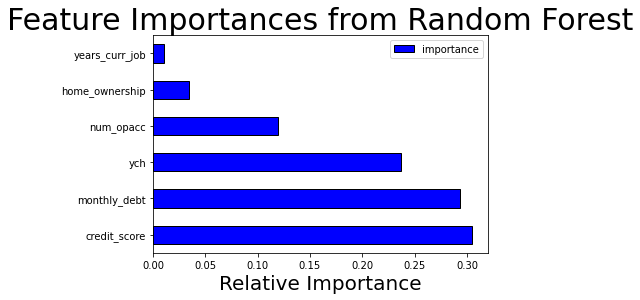

In [ ]:
figsize=(12, 10)

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', edgecolor = 'k',kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

## **ROC Curve**

In [ ]:
# **Generate synthetic dataset**
from sklearn.datasets import make_classification
import numpy as np
X=x2train[Best_features]
Y=y2train

#**Data splitting**
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

#**Build classification model**
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#**Random Forest**
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

#**Naive Bayes**
nb = naive_bayes.GaussianNB()
nb.fit(X_train, Y_train)

#**Linear Rigression**
lr=linear_model.LogisticRegression()
lr.fit(X_train, Y_train)

#**Decision Tree**
dt=tree.DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, Y_train)

#**KNN neighbours**
kn=neighbors.KNeighborsClassifier()
kn.fit(X_train, Y_train)

#**Prediction probabilities**
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)
kn_probs = kn.predict_proba(X_test)

#Probabilities for the positive outcome is kept.
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]
dt_probs = dt_probs[:, 1]
kn_probs = kn_probs[:, 1]

#**Computing AUROC and ROC curve values**
from sklearn.metrics import roc_curve, roc_auc_score

#**Calculate AUROC**
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
dt_auc = roc_auc_score(Y_test, dt_probs)
kn_auc = roc_auc_score(Y_test, kn_probs)

#r_auc = roc_auc_score(Y_test, r_probs)
#rf_auc = 0.636848
#nb_auc = 0.641171
#lr_auc = 0.632981
#dt_auc = 0.670069
#kn_auc = 0.633550

In [ ]:
#**Print AUROC scores**
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('KNN neighbors: AUROC = %.3f' % (kn_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.731
Naive Bayes: AUROC = 0.663
Logistic Regression: AUROC = 0.567
Decision Tree: AUROC = 0.701
KNN neighbors: AUROC = 0.641


In [ ]:
#**Calculate ROC curve**
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_probs)
kn_fpr, kn_tpr, _ = roc_curve(Y_test, kn_probs)

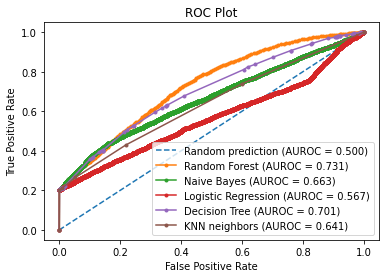

In [ ]:
#**Plot the ROC curve**
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='KNN neighbors (AUROC = %0.3f)' % kn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()
